In [1]:
import os
current_path = os.getcwd()
import numpy as np
from numpy import seterr
seterr(all='raise')
import matplotlib.pyplot as plt
import math
import random
from tqdm import tqdm
import sys
sys.path.append(current_path)
sys.path.append(current_path+'/../../')
import myInput
import PACKAGE_MP_Linear as linear2d
import post_processing
sys.path.append(current_path+'/../calculate_tangent/')

import importlib
importlib.reload(post_processing)


<module 'post_processing' from '/home/lin.yang/projects/VECTOR/examples/microstructure/../../post_processing.py'>

In [2]:
if __name__ == '__main__':
    # File name
    npy_file_folder = "/blue/michael.tonks/lin.yang/SPPARKS-VirtualIncEnergy/3d_poly_fully/results/"
    data_type = "264_5k"
    npy_file_name_aniso = f"p_ori_fully5d_fzab_aveE_f1.0_t1.0_{data_type}_multiCore64_J1_refer_1_0_0_seed56689_kt1.95.npy"
    
    # Initial data
    npy_file_aniso = np.load(npy_file_folder + npy_file_name_aniso)
    print(f"The {data_type} data size is: {npy_file_aniso.shape}")
    print("READING DATA DONE")

    
    

The 264_5k data size is: (51, 264, 264, 264)
READING DATA DONE


/home/lin.yang/projects/VECTOR/examples/microstructure/../../post_processing.py:83: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


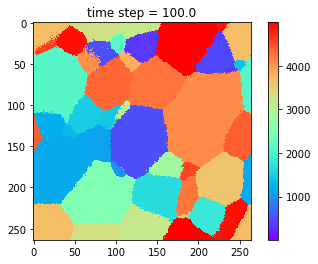

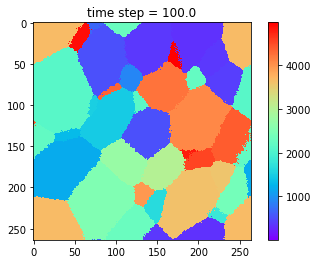

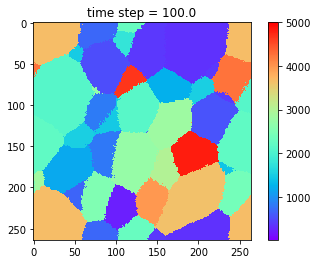

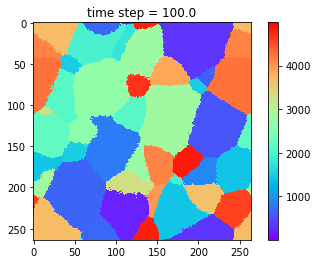

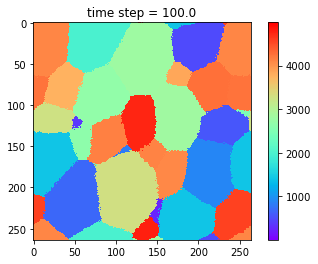

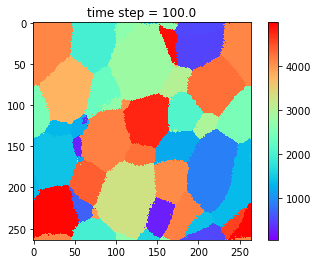

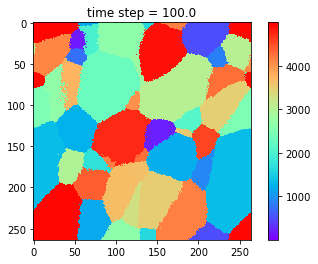

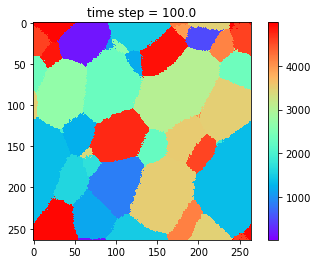

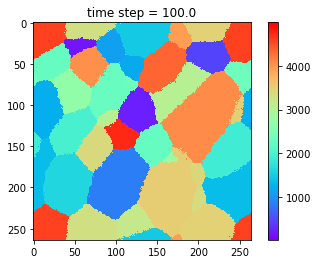

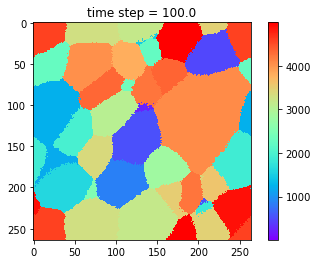

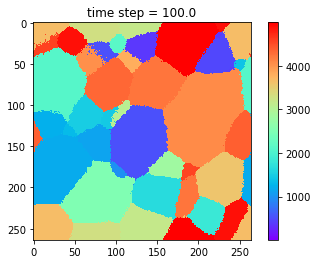

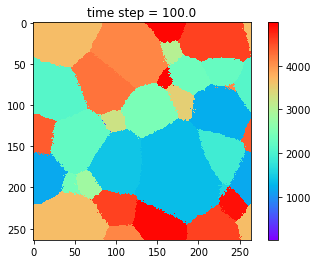

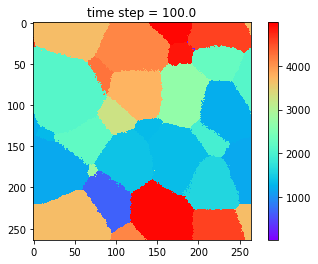

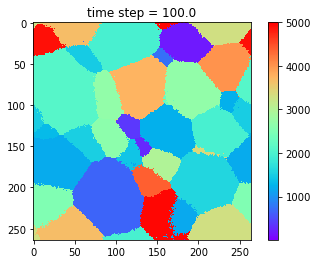

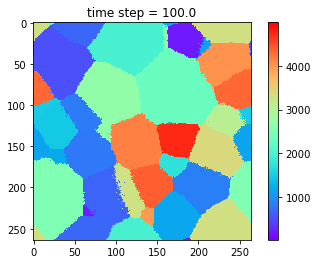

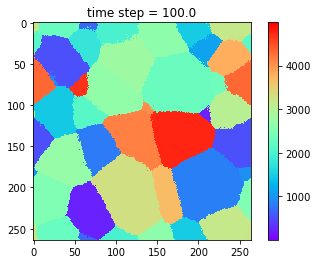

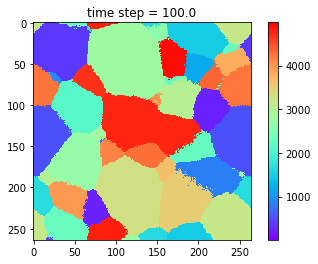

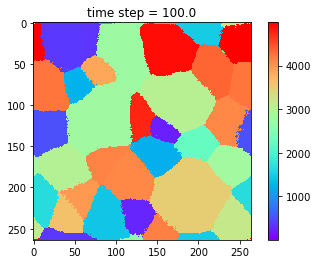

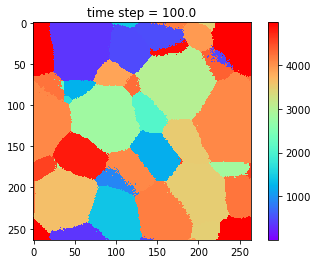

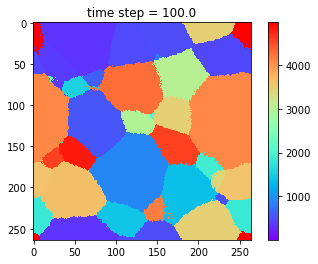

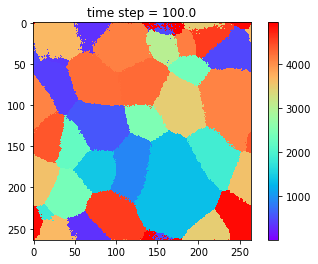

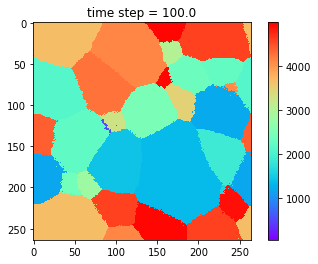

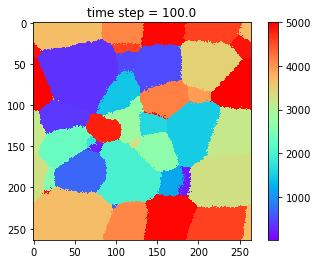

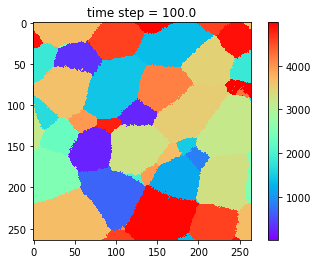

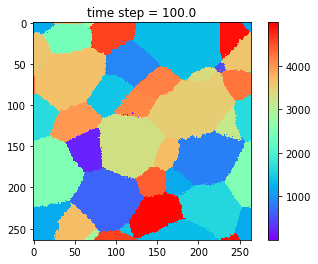

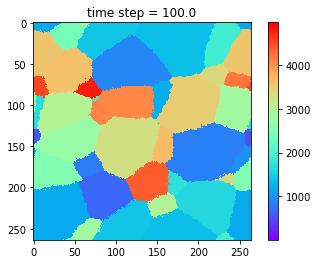

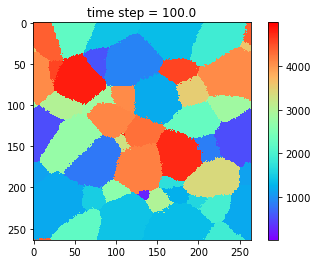

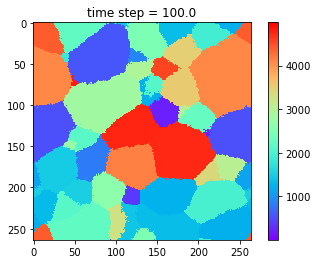

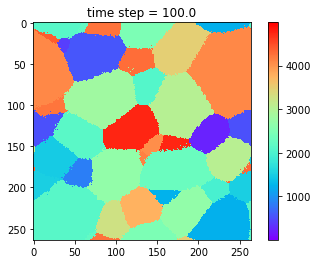

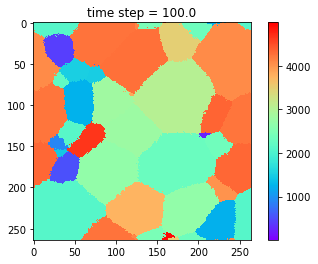

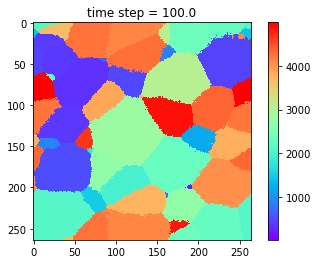

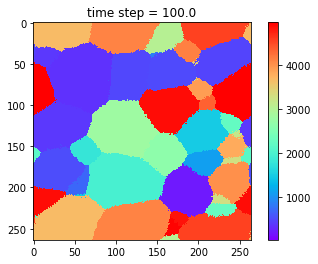

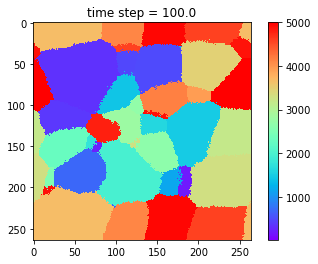

In [4]:
    # necessary data
    steps_num = len(npy_file_aniso)
    time_steps = np.linspace(0,steps_num-1,steps_num)*2
    depth_list0 = list(map(int,np.linspace(0,npy_file_aniso.shape[1]-1,11)))
    depth_list1 = list(map(int,np.linspace(0,npy_file_aniso.shape[2]-1,11)))
    depth_list2 = list(map(int,np.linspace(0,npy_file_aniso.shape[3]-1,11)))
    
    # Start microstructure figure
    dimension_list = [0,1,2]
    for dimension in dimension_list:
        for depth in depth_list2:
            figure_path = current_path + f"/figures/3Dmicrostructure_264D5k_dimension{dimension}_depth{depth}"
            post_processing.plot_structure_video(time_steps, npy_file_aniso, figure_path, dimension, depth)

/scratch/local/26200650/ipykernel_572900/3537183140.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<Figure size 432x288 with 0 Axes>

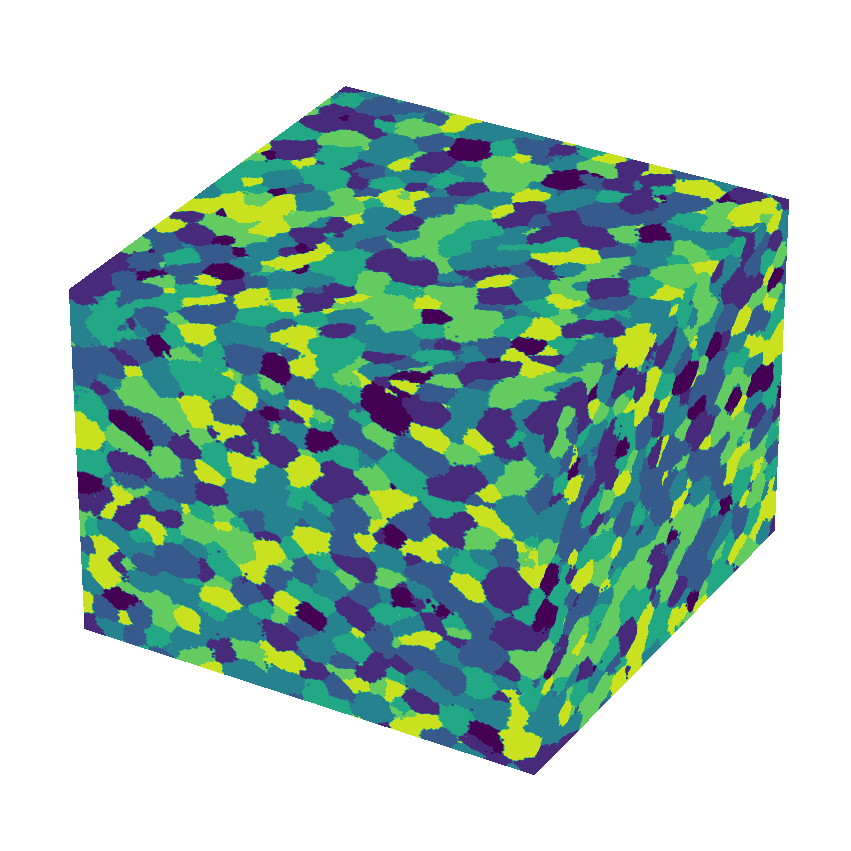

<Figure size 432x288 with 0 Axes>

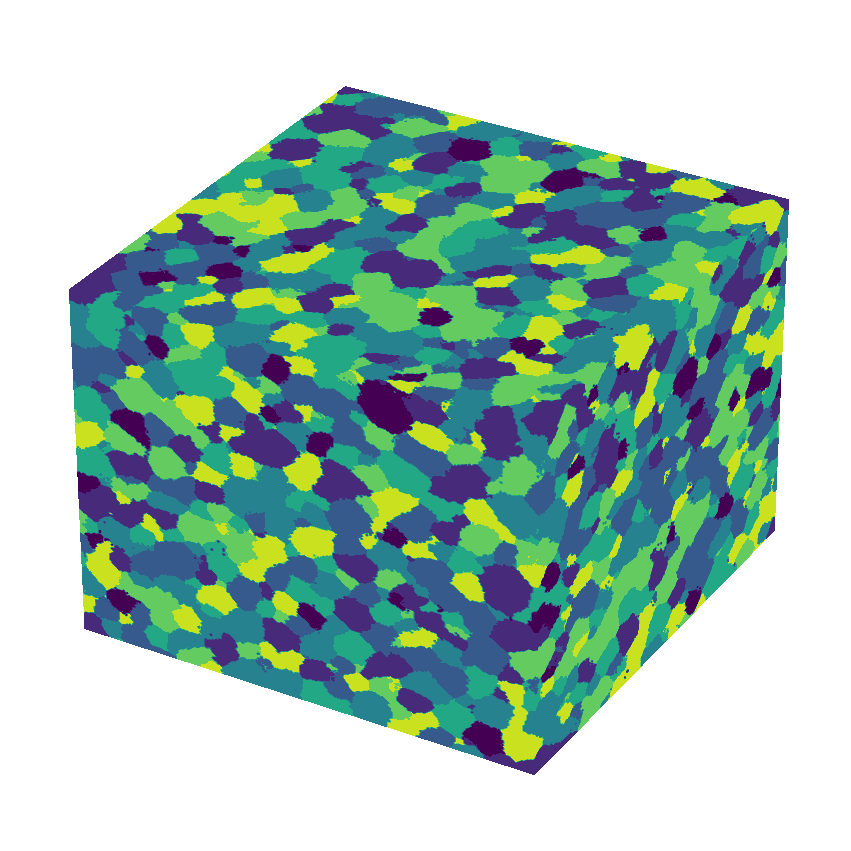

<Figure size 432x288 with 0 Axes>

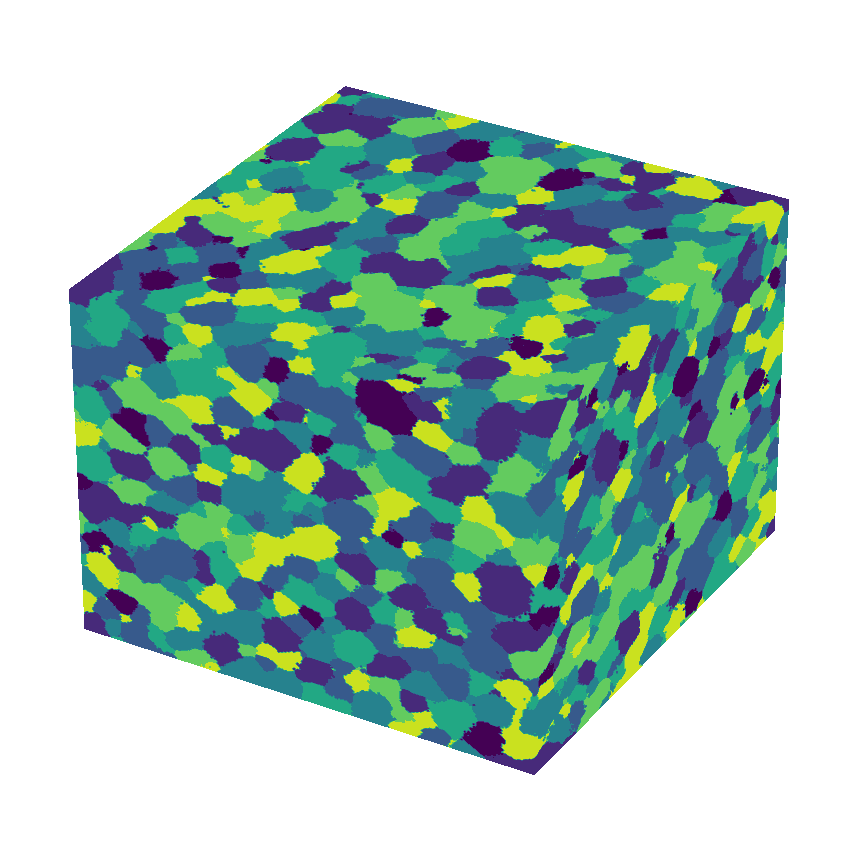

<Figure size 432x288 with 0 Axes>

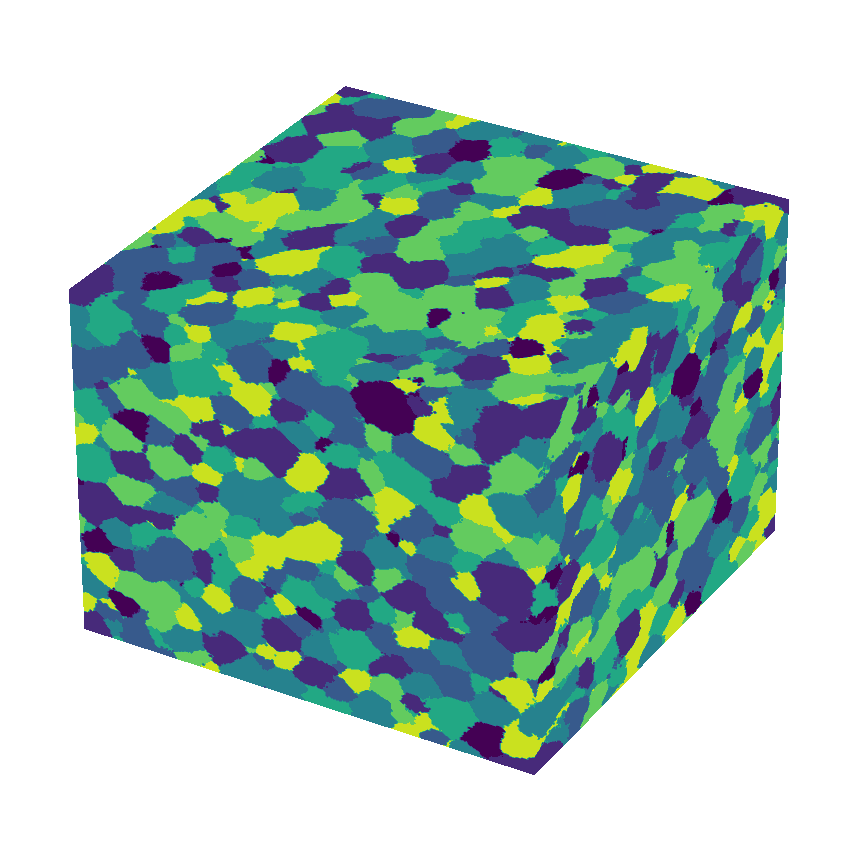

<Figure size 432x288 with 0 Axes>

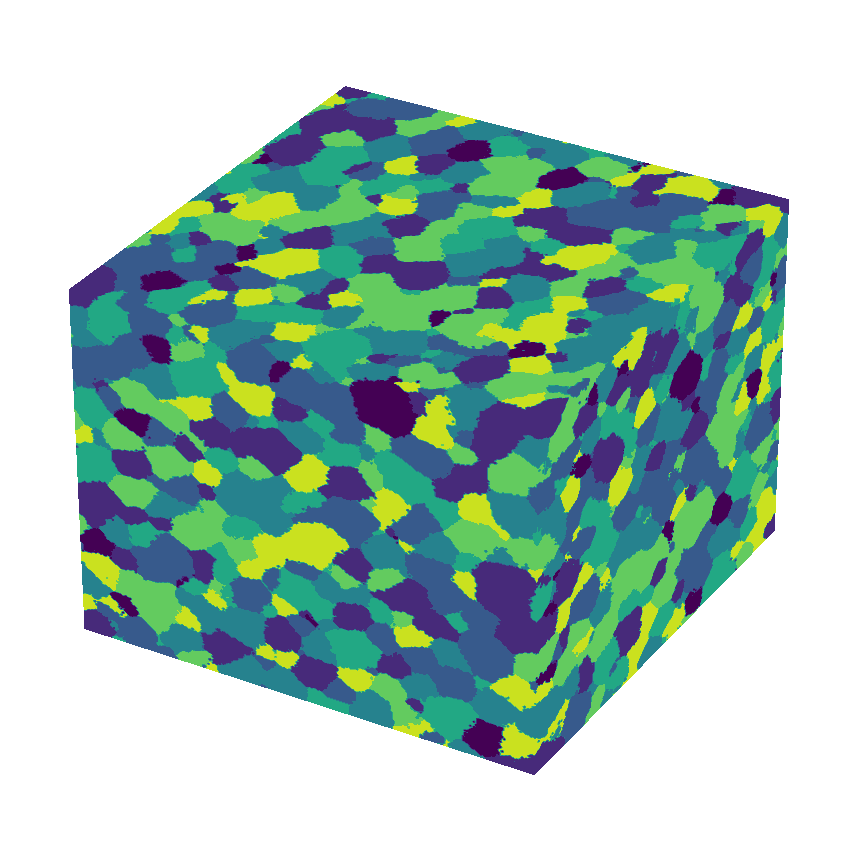

<Figure size 432x288 with 0 Axes>

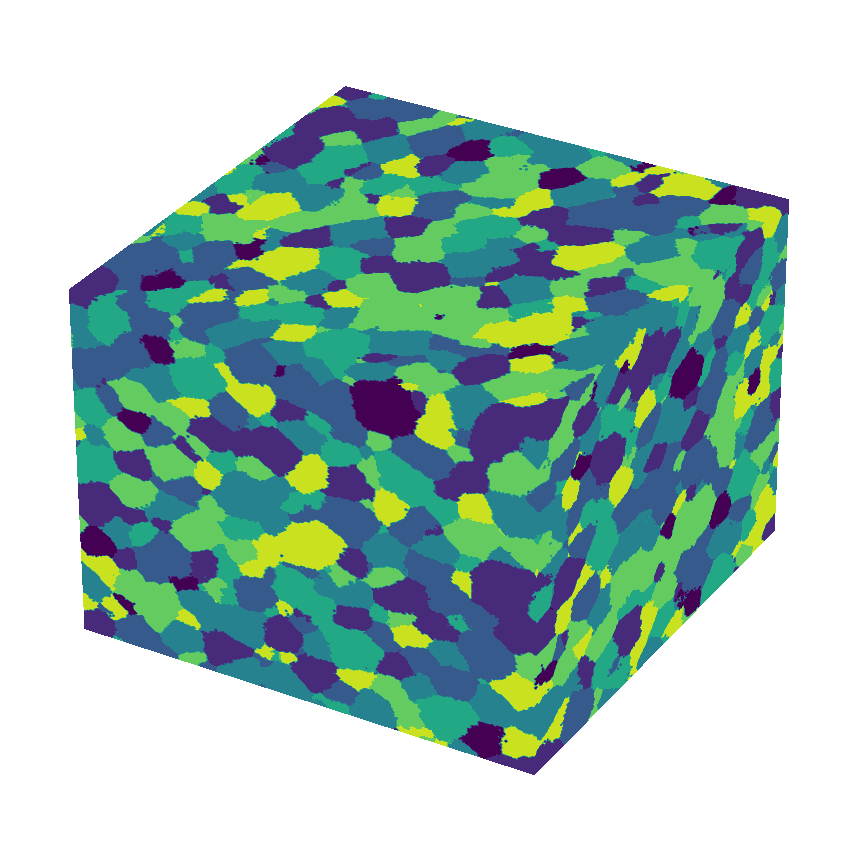

<Figure size 432x288 with 0 Axes>

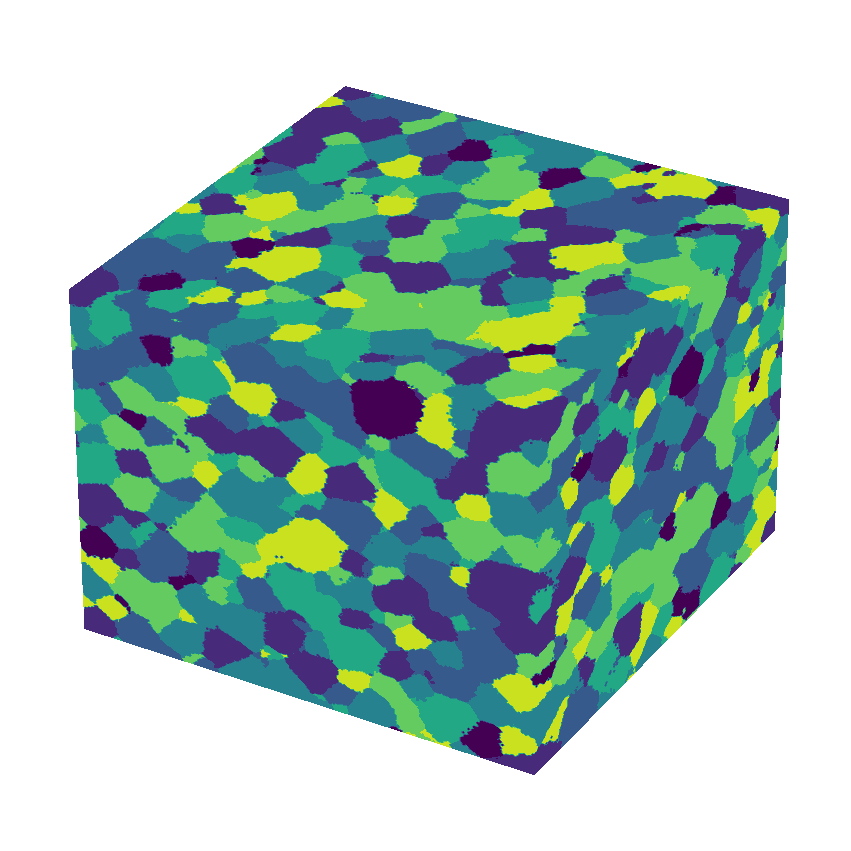

<Figure size 432x288 with 0 Axes>

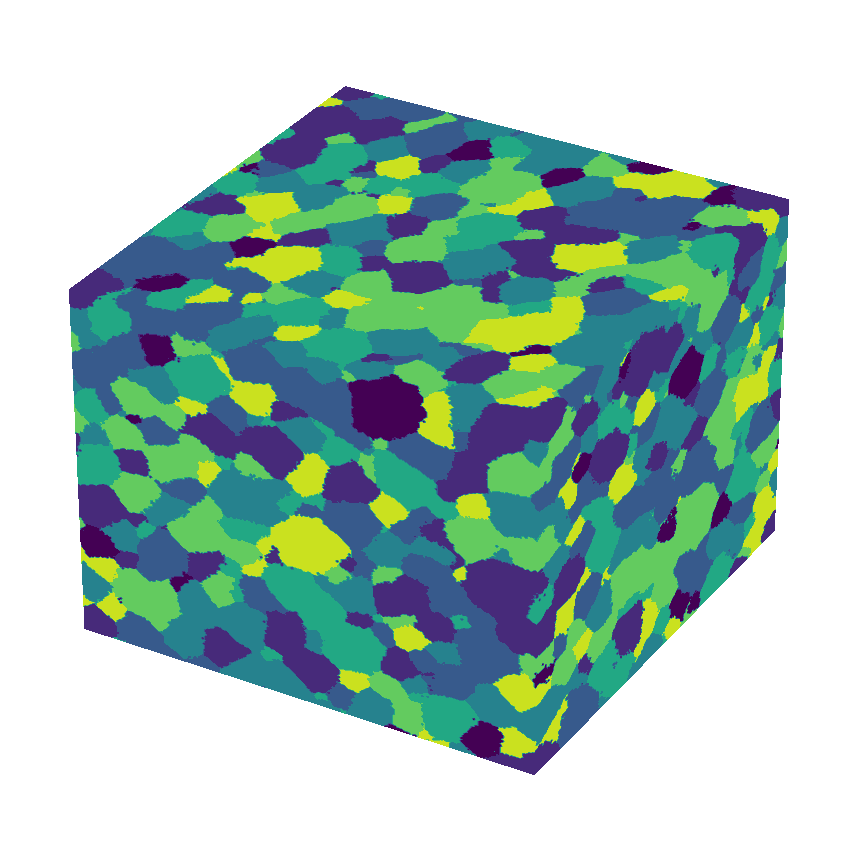

<Figure size 432x288 with 0 Axes>

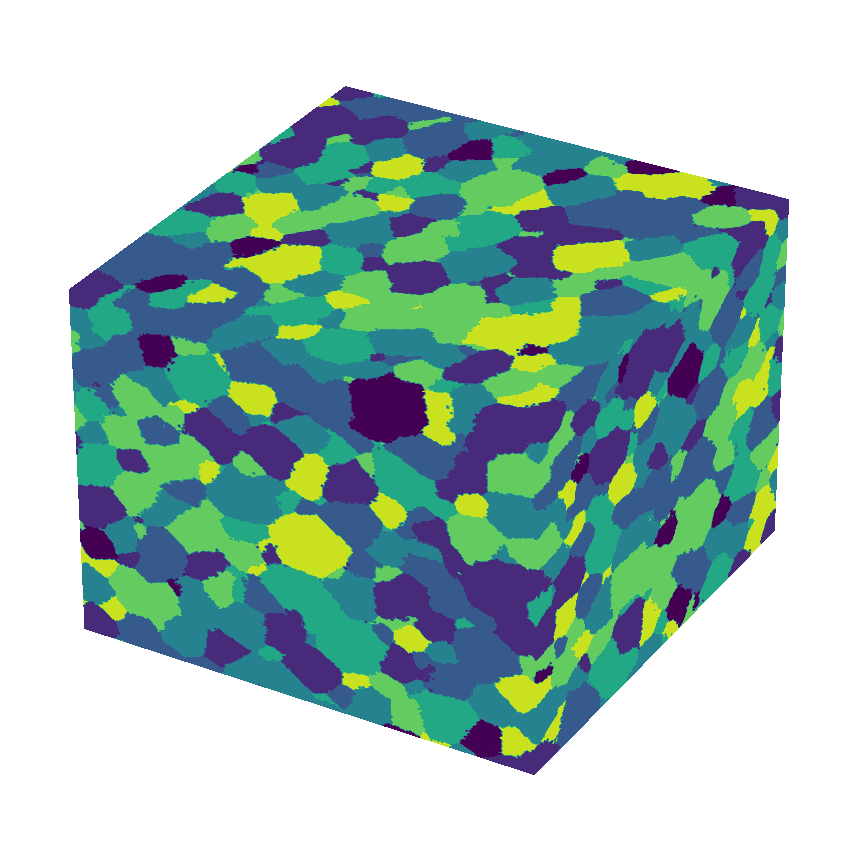

<Figure size 432x288 with 0 Axes>

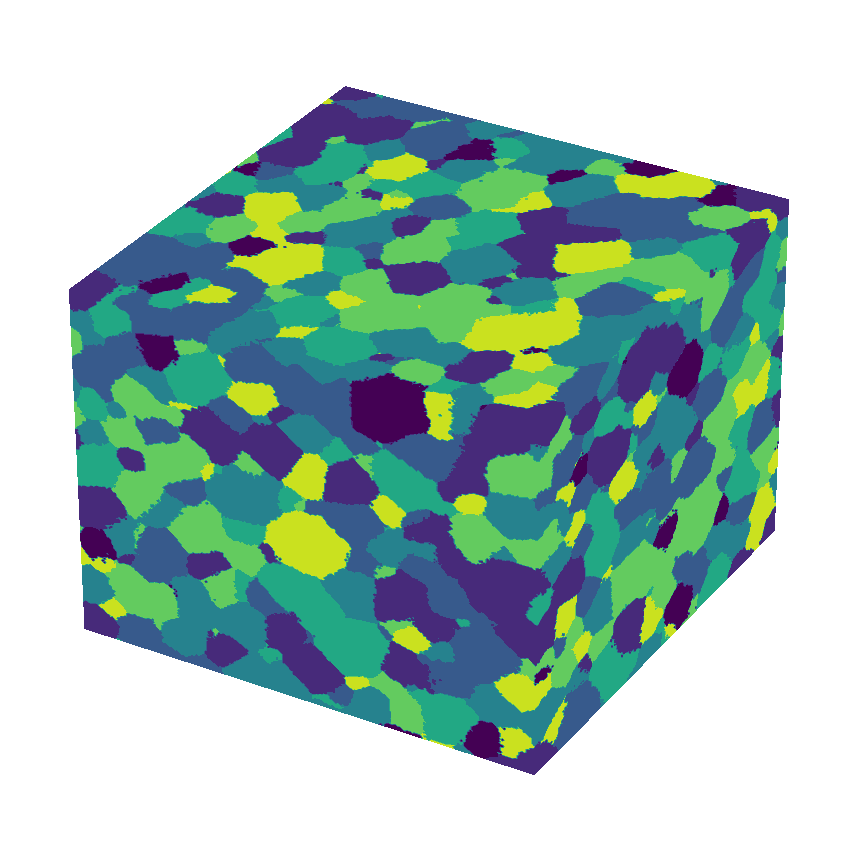

<Figure size 432x288 with 0 Axes>

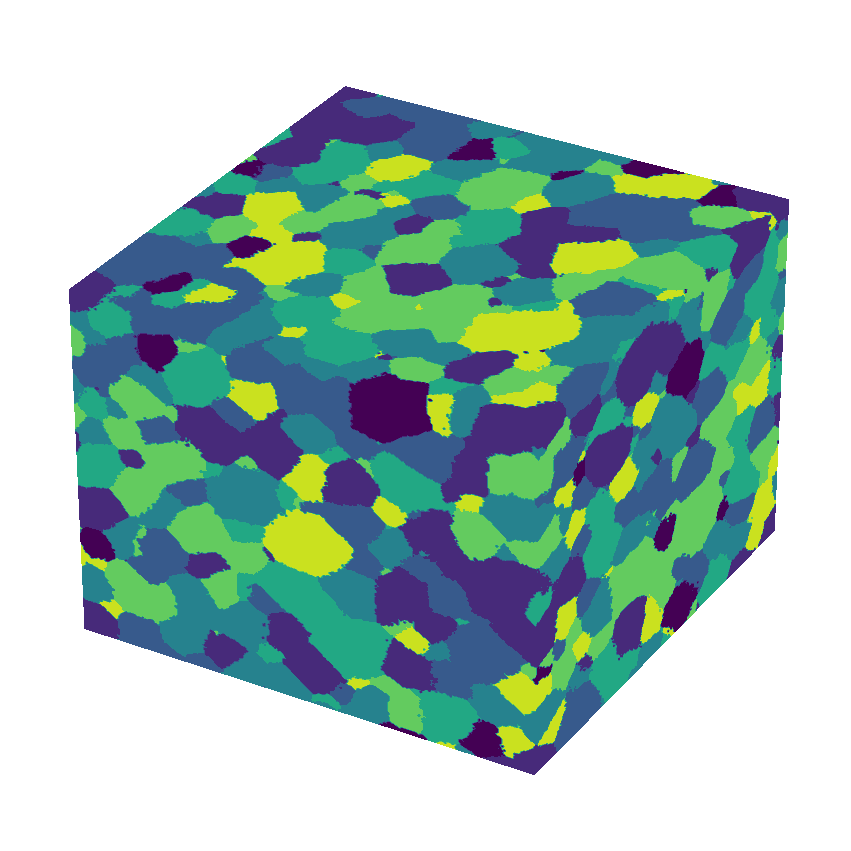

<Figure size 432x288 with 0 Axes>

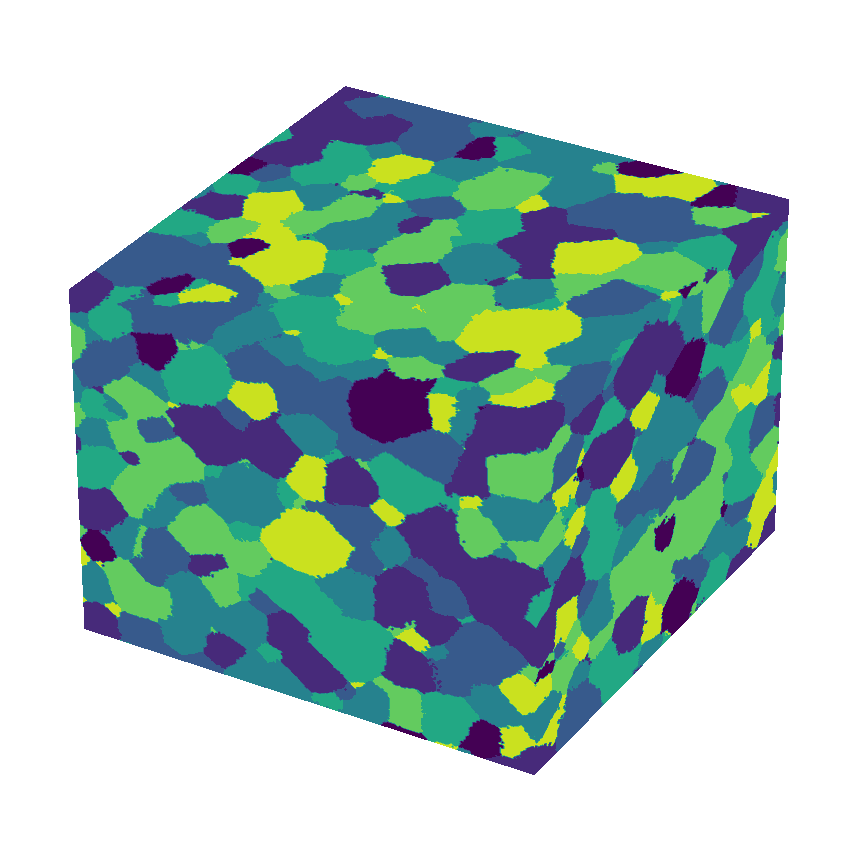

<Figure size 432x288 with 0 Axes>

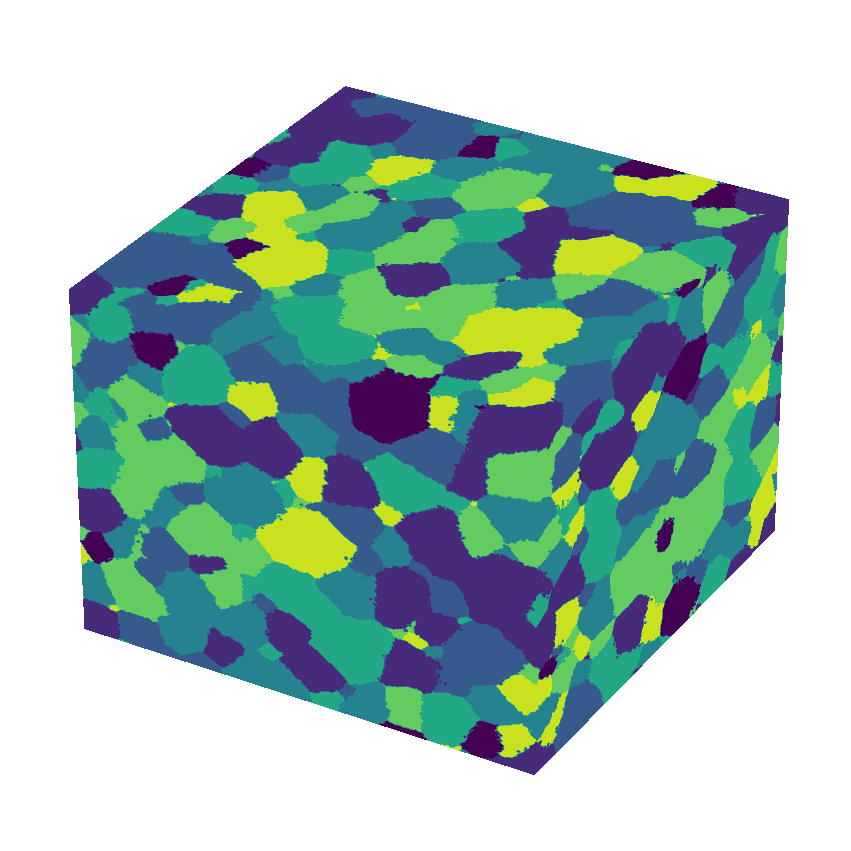

<Figure size 432x288 with 0 Axes>

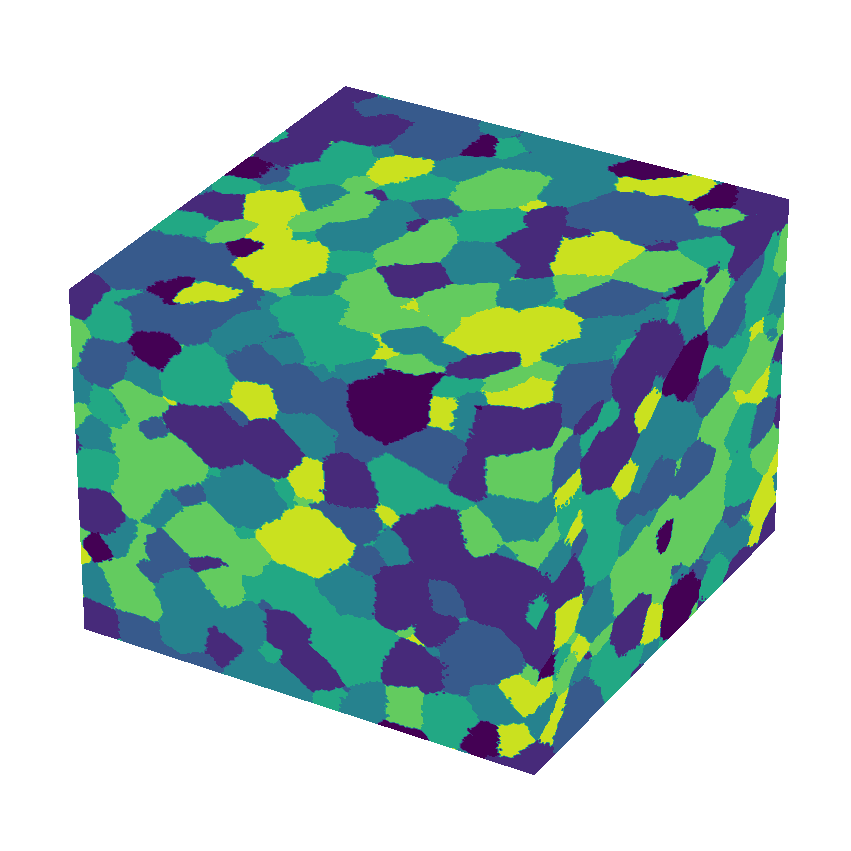

<Figure size 432x288 with 0 Axes>

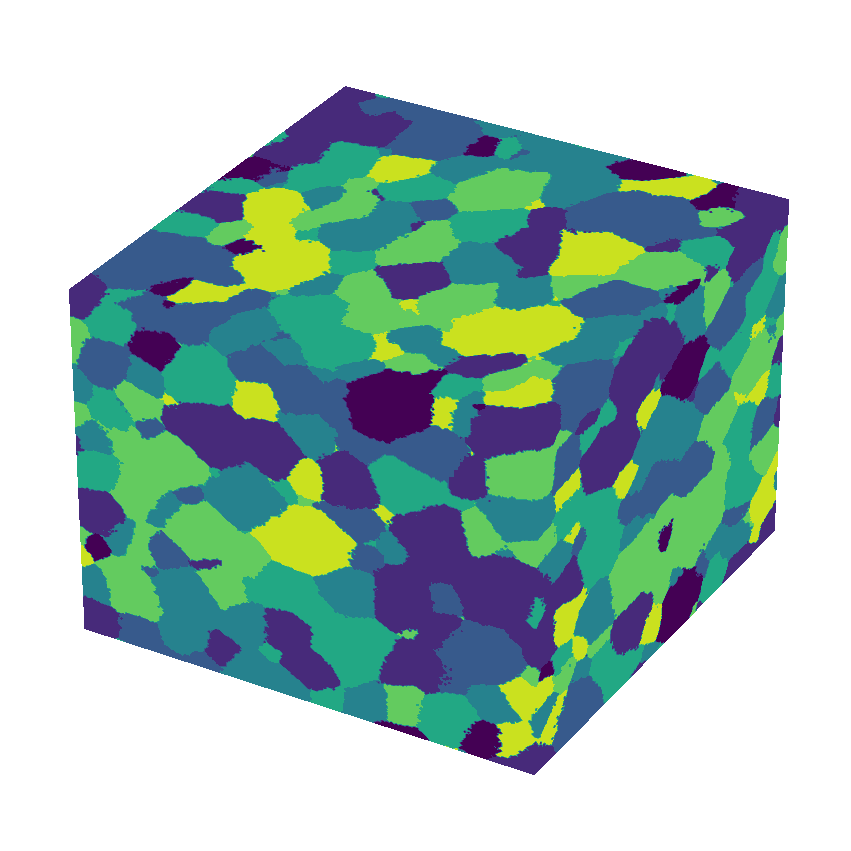

<Figure size 432x288 with 0 Axes>

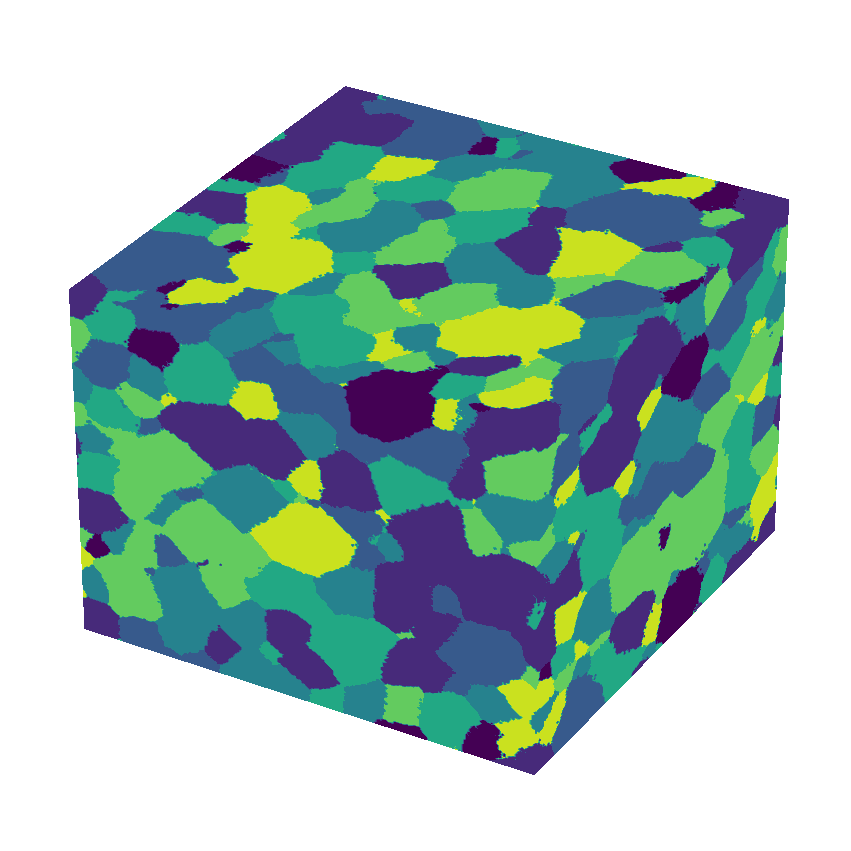

<Figure size 432x288 with 0 Axes>

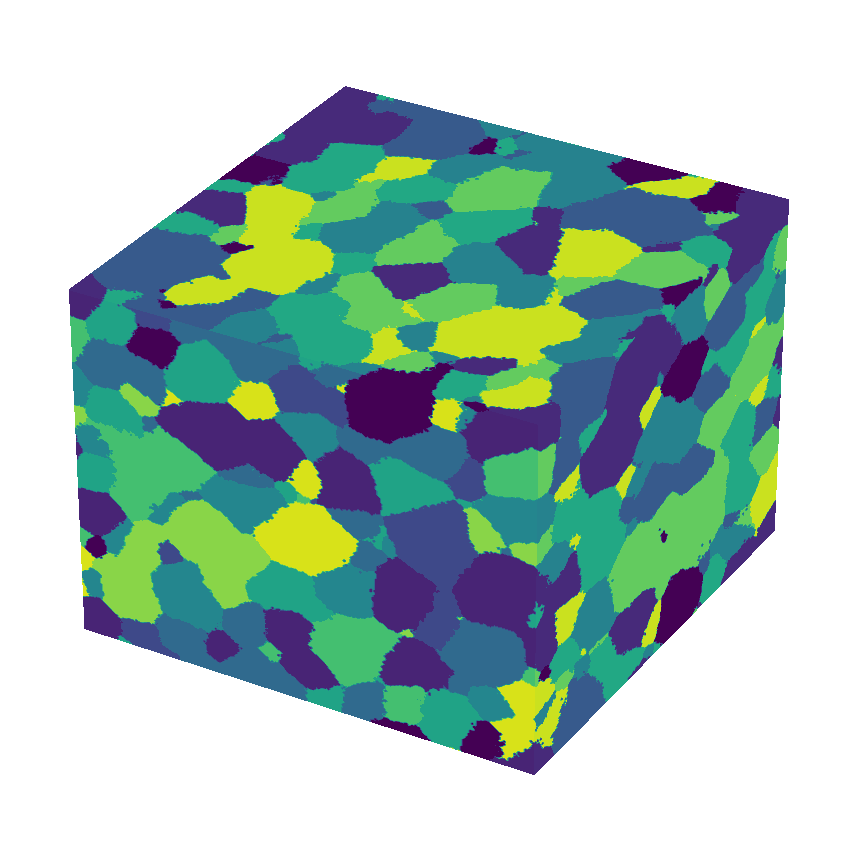

<Figure size 432x288 with 0 Axes>

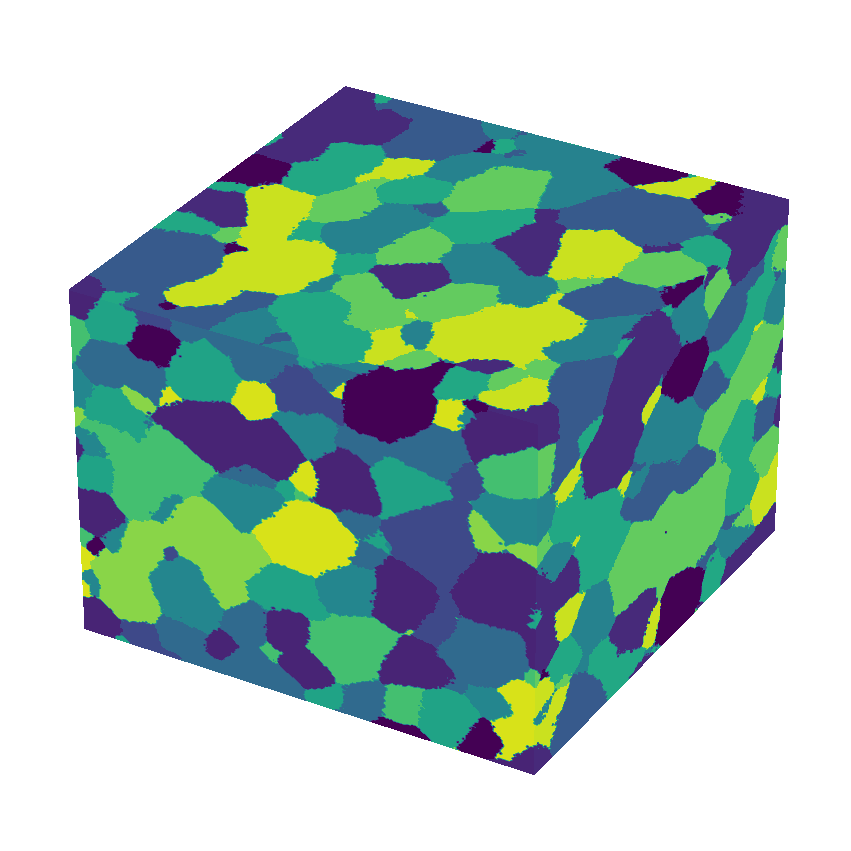

<Figure size 432x288 with 0 Axes>

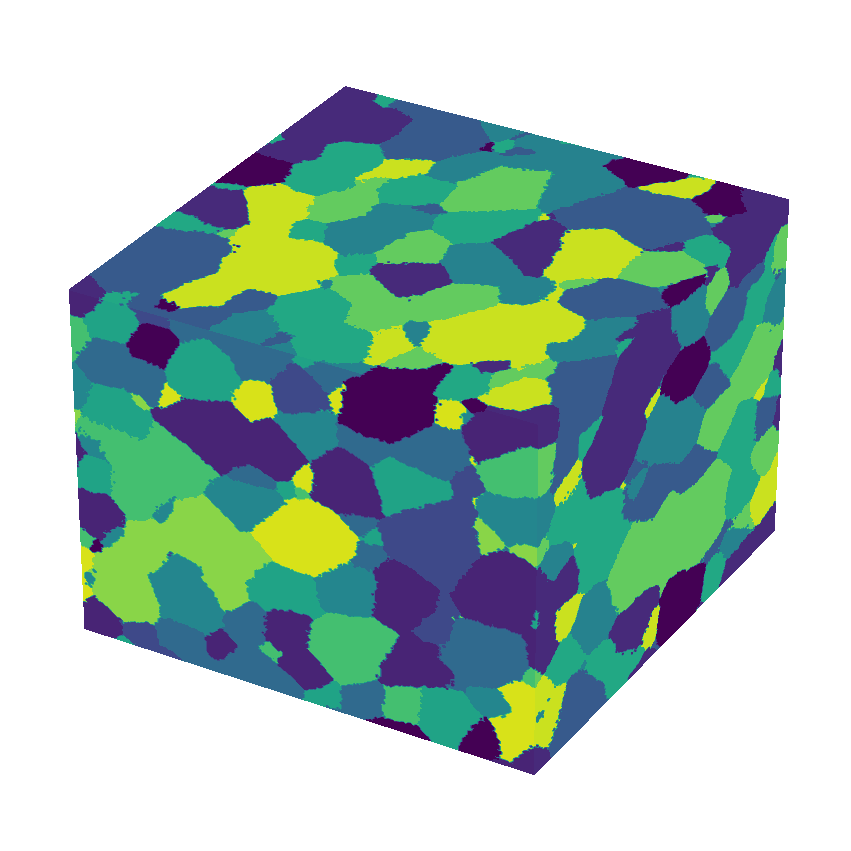

<Figure size 432x288 with 0 Axes>

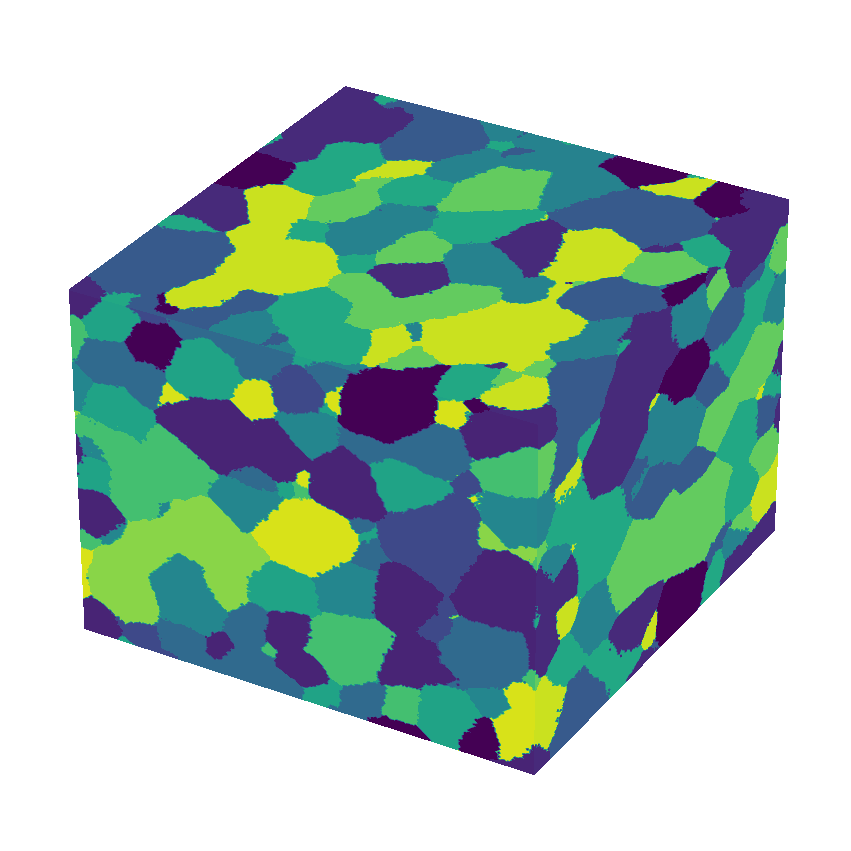

<Figure size 432x288 with 0 Axes>

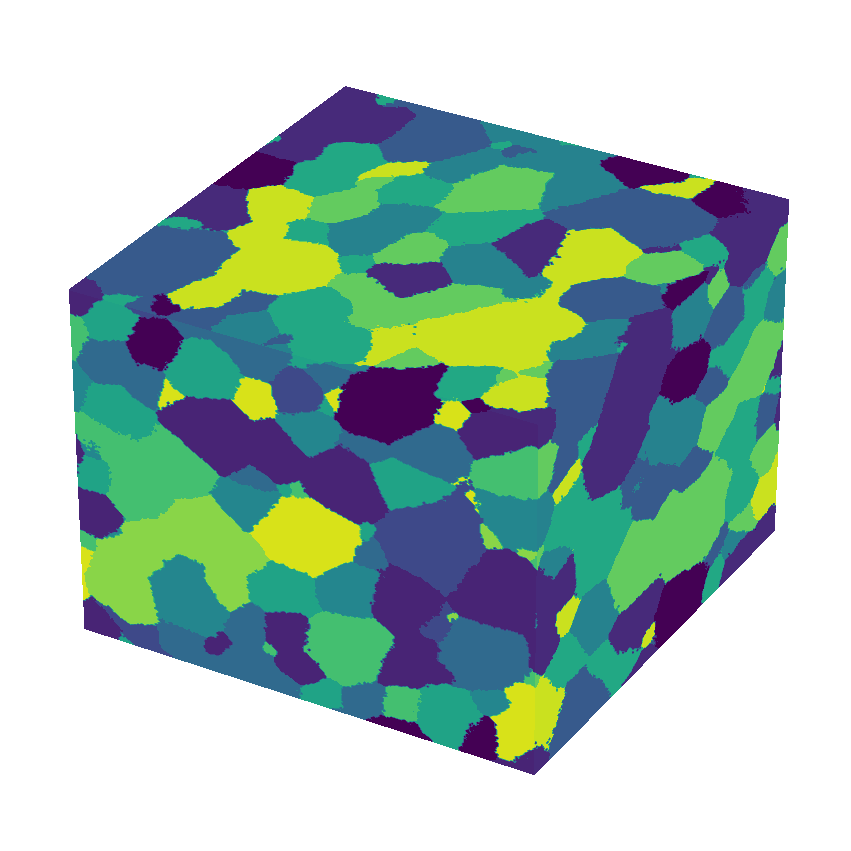

<Figure size 432x288 with 0 Axes>

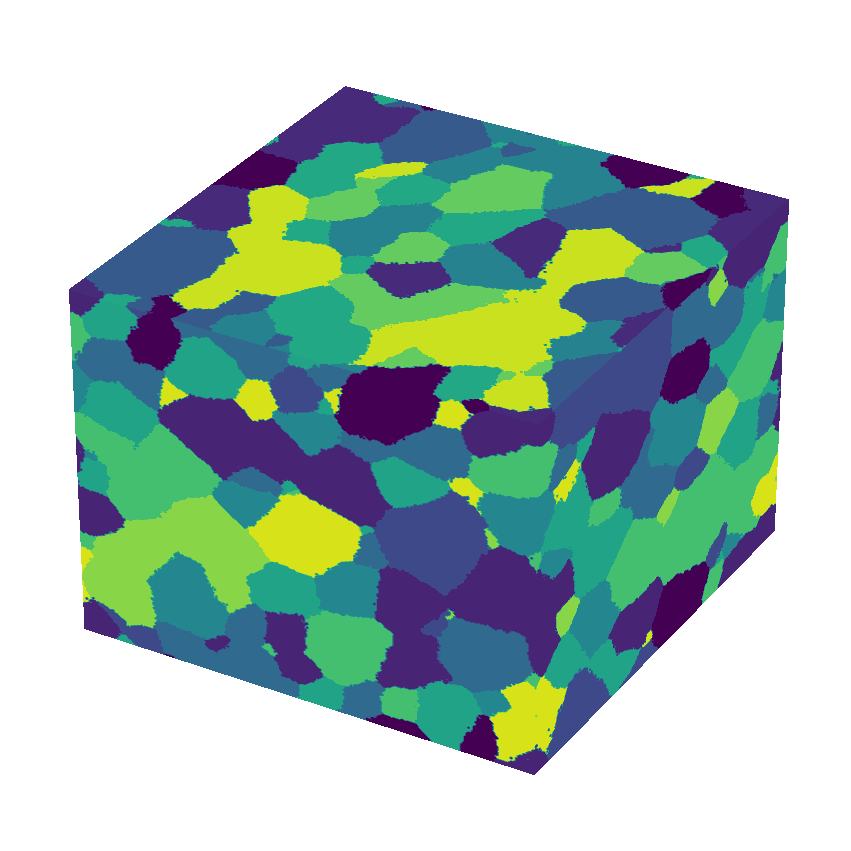

<Figure size 432x288 with 0 Axes>

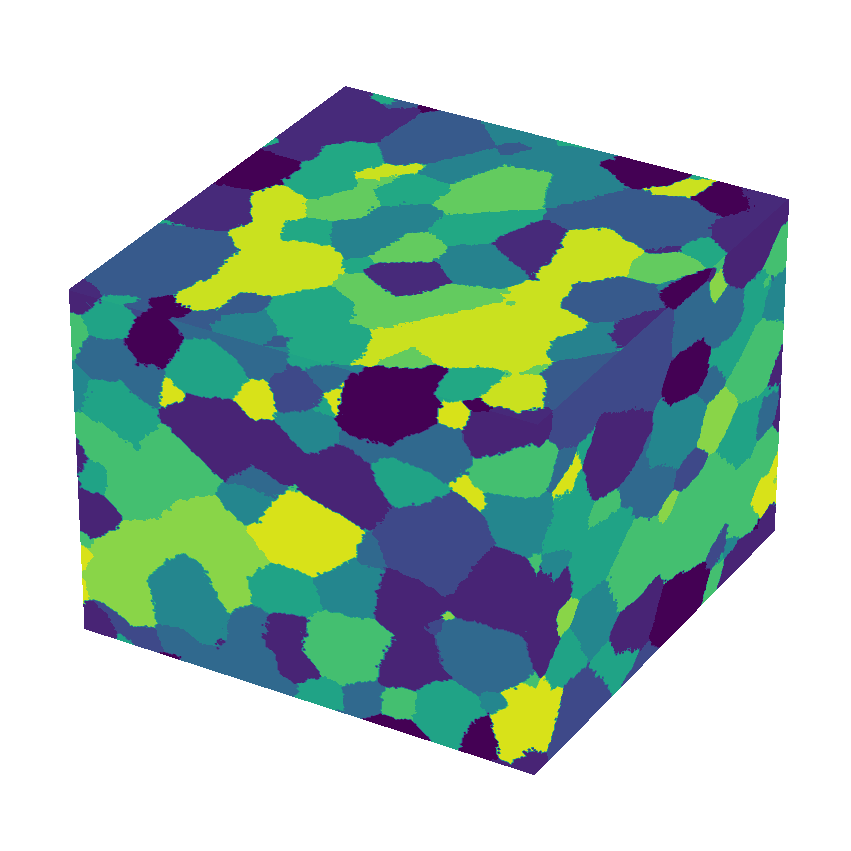

<Figure size 432x288 with 0 Axes>

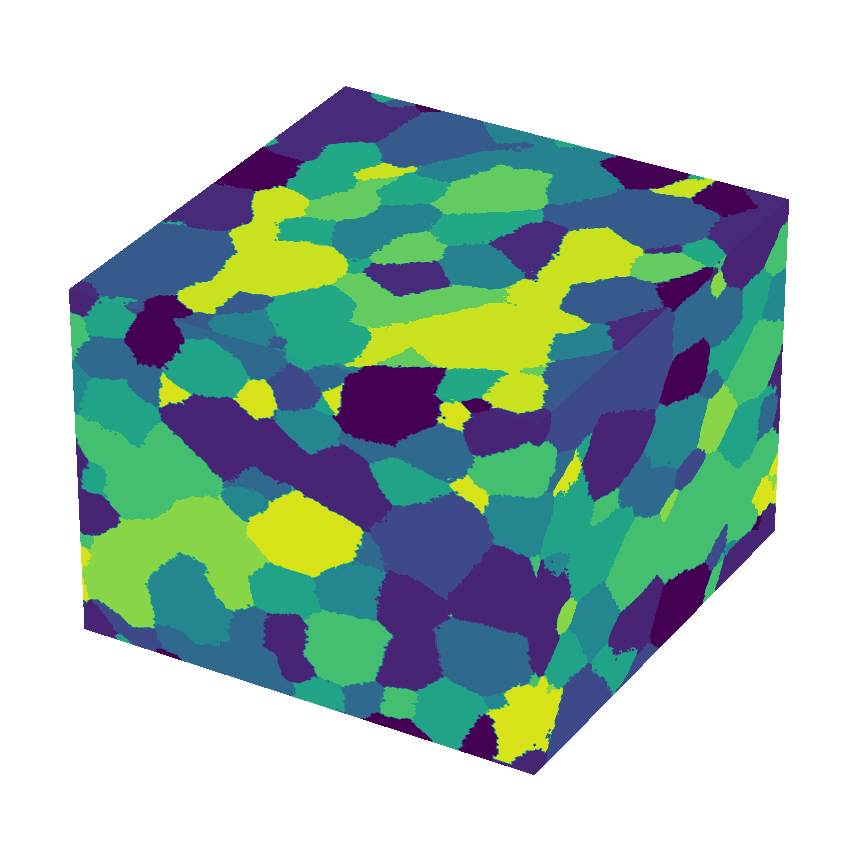

<Figure size 432x288 with 0 Axes>

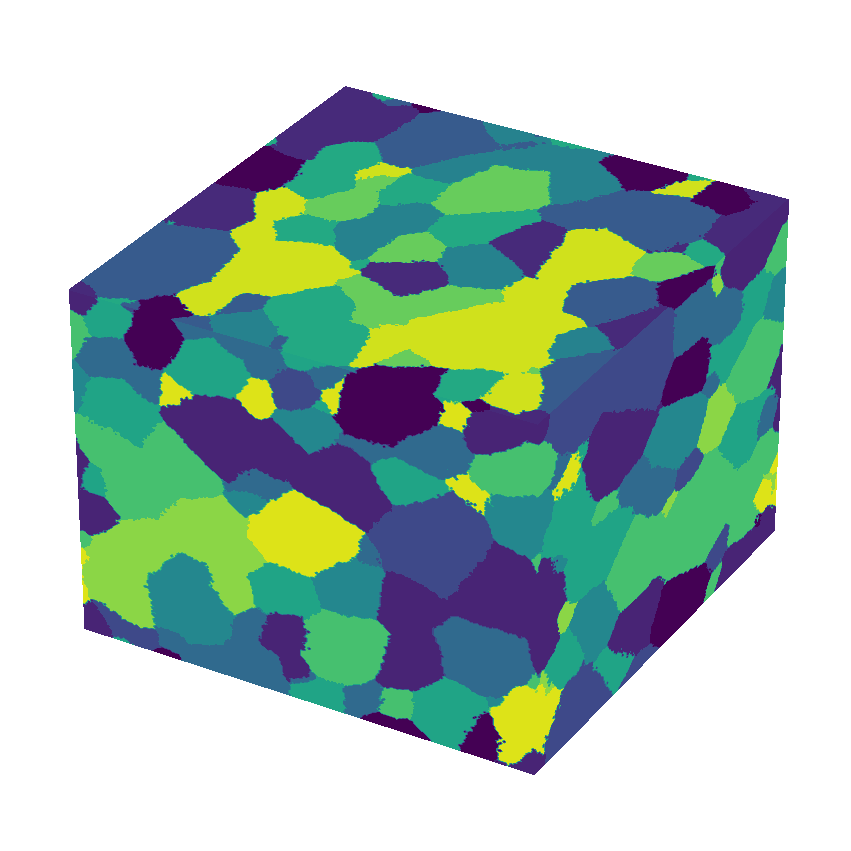

<Figure size 432x288 with 0 Axes>

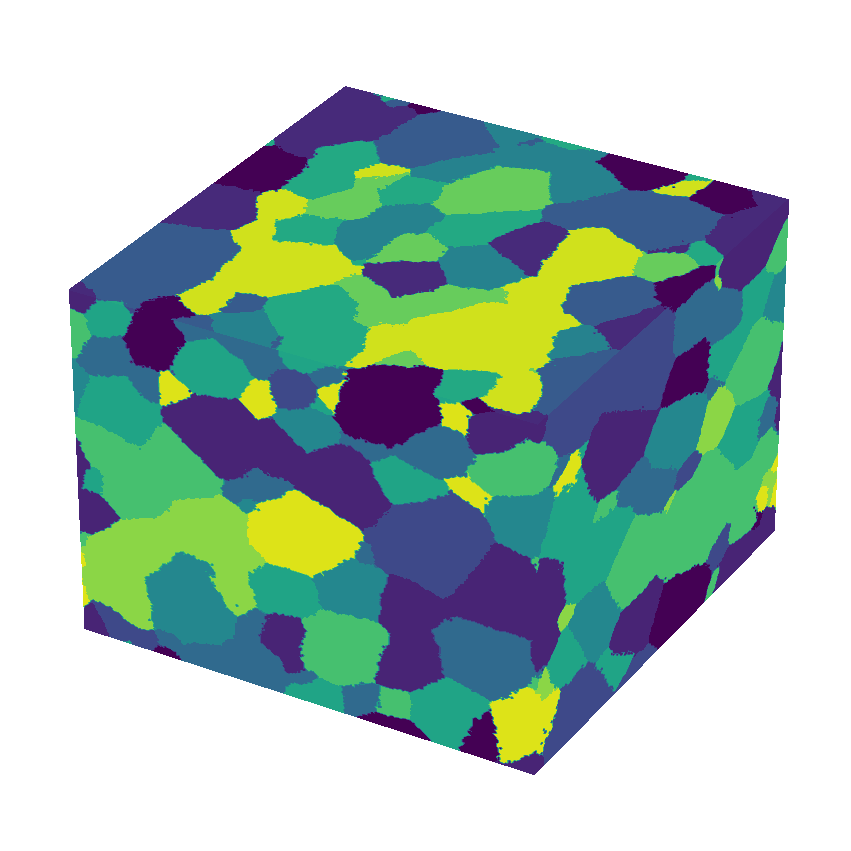

<Figure size 432x288 with 0 Axes>

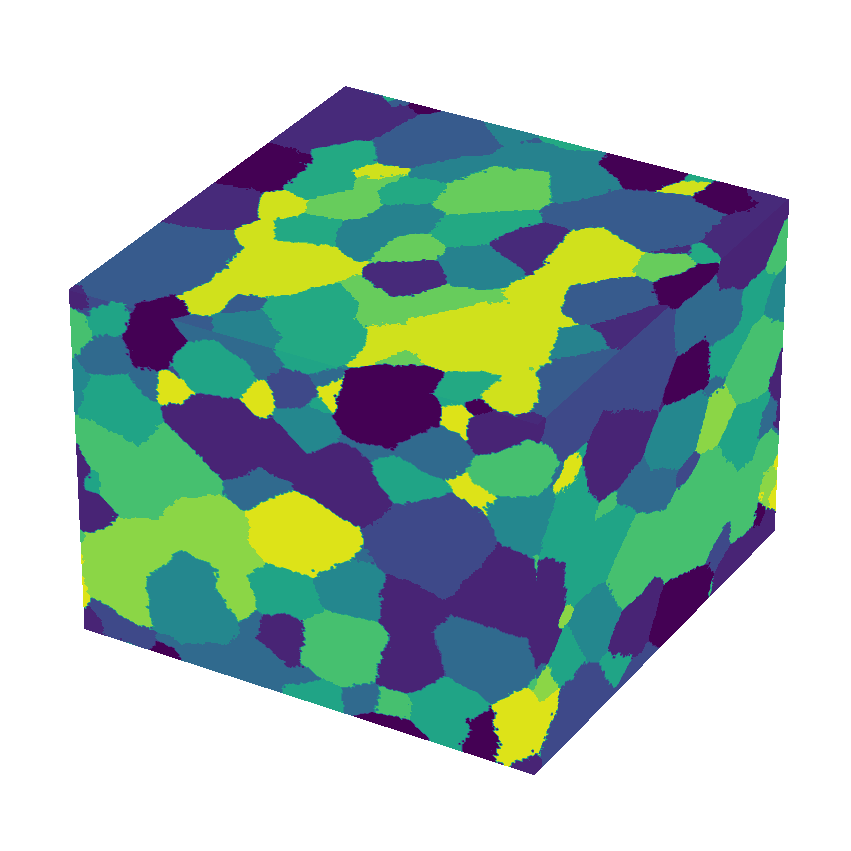

<Figure size 432x288 with 0 Axes>

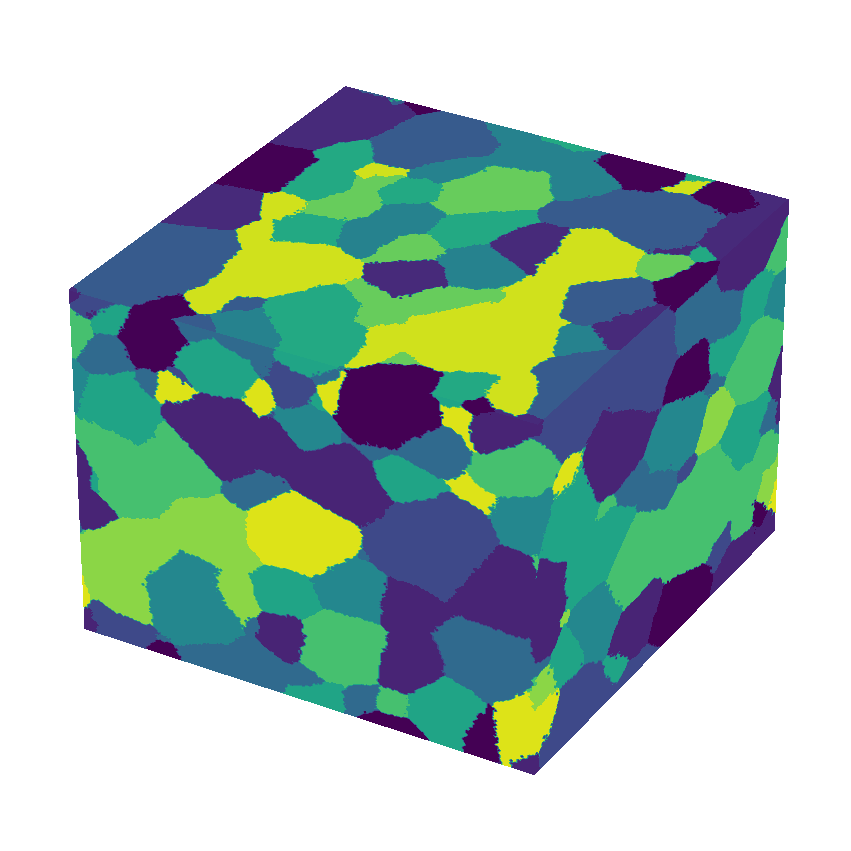

<Figure size 432x288 with 0 Axes>

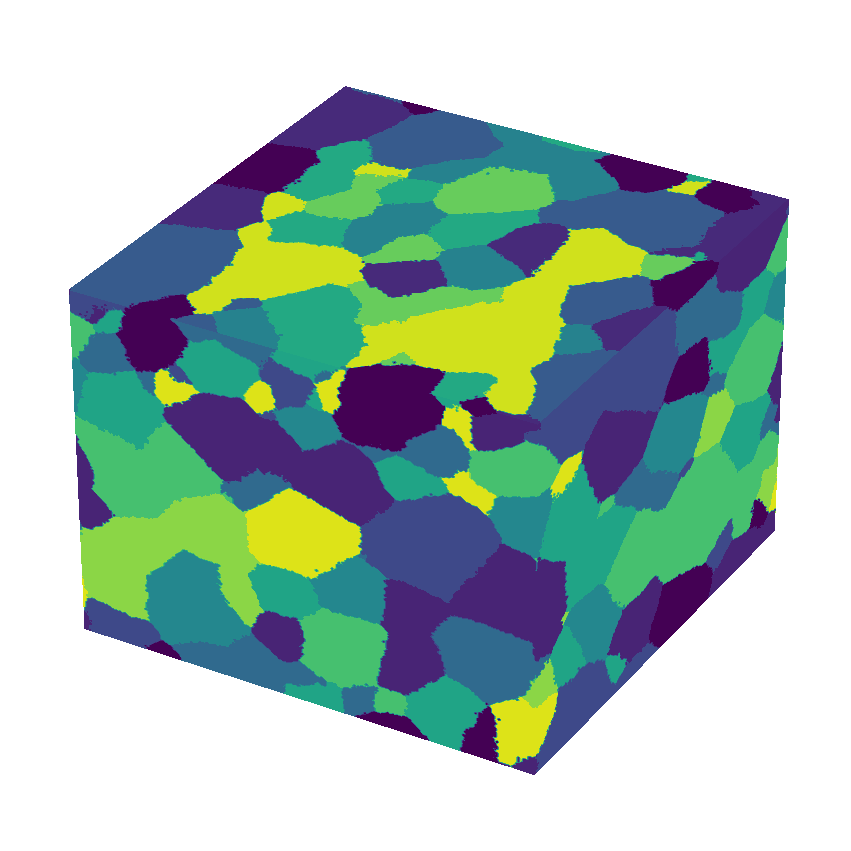

<Figure size 432x288 with 0 Axes>

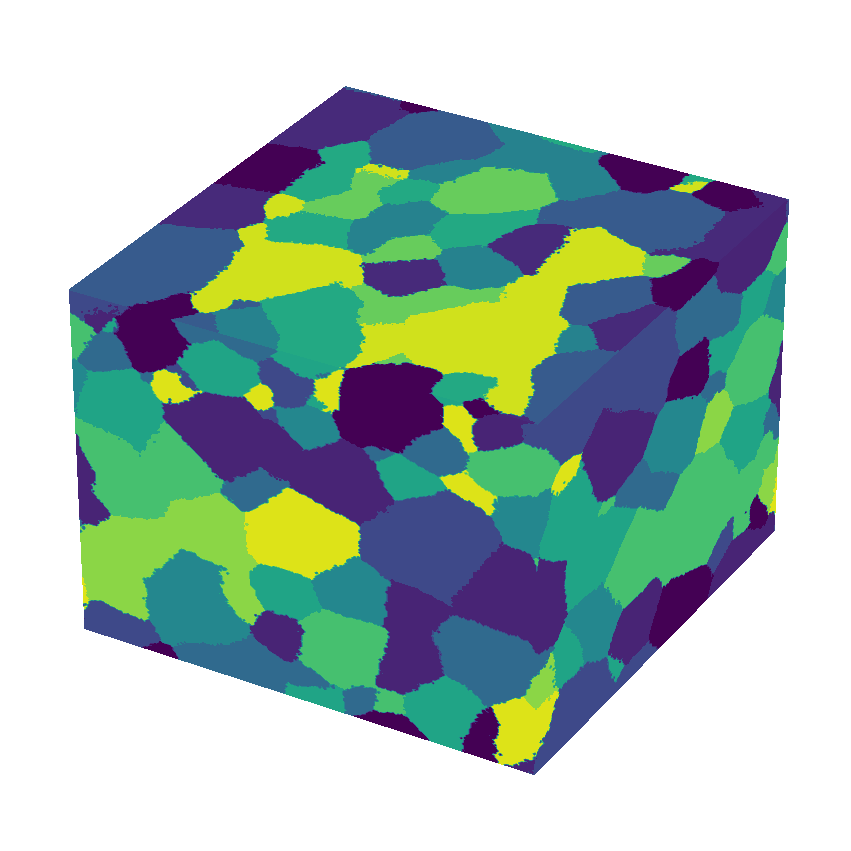

<Figure size 432x288 with 0 Axes>

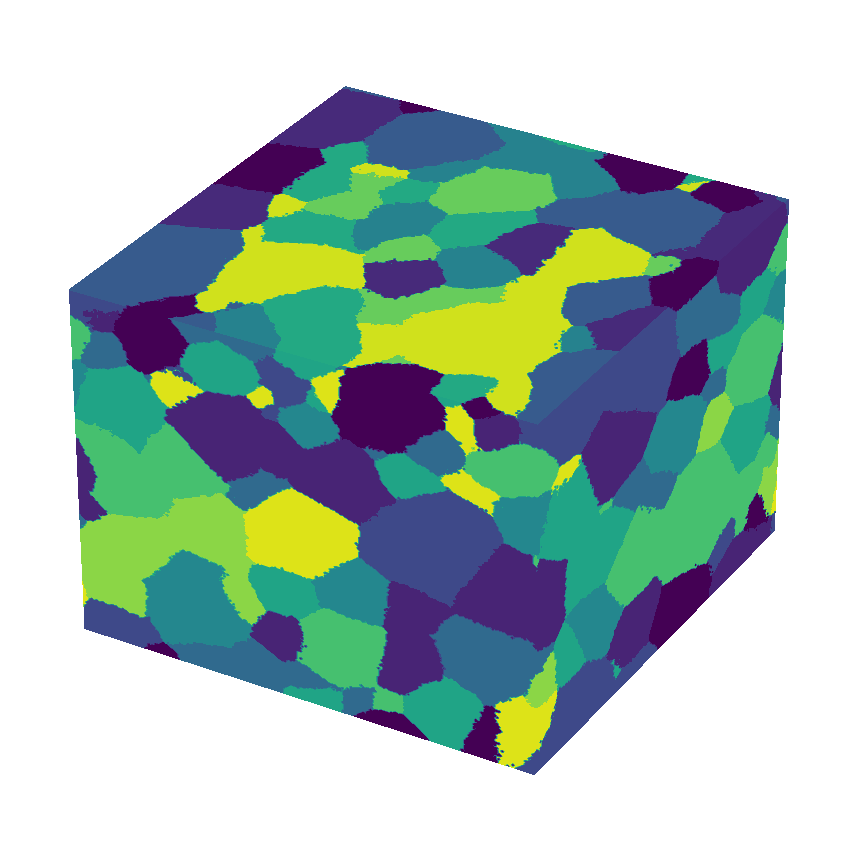

<Figure size 432x288 with 0 Axes>

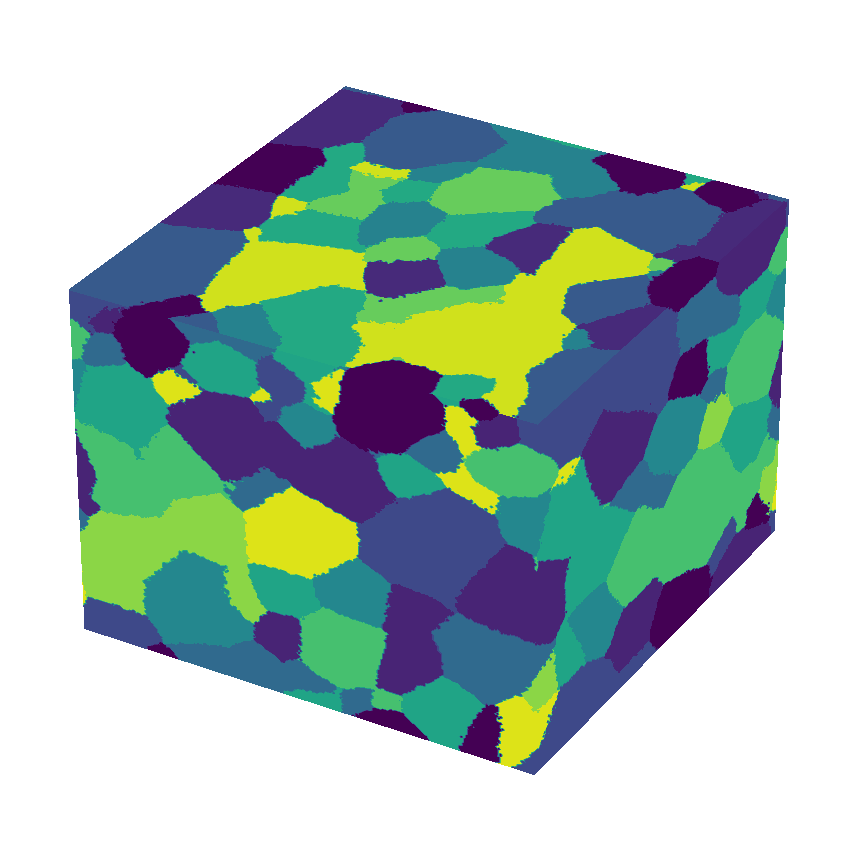

<Figure size 432x288 with 0 Axes>

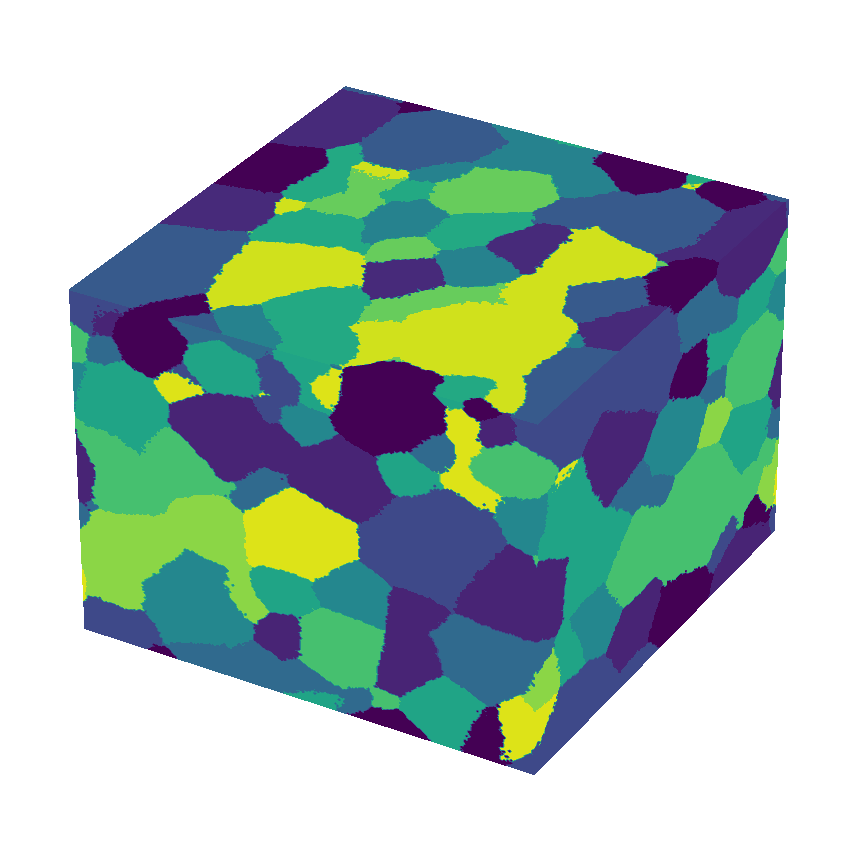

<Figure size 432x288 with 0 Axes>

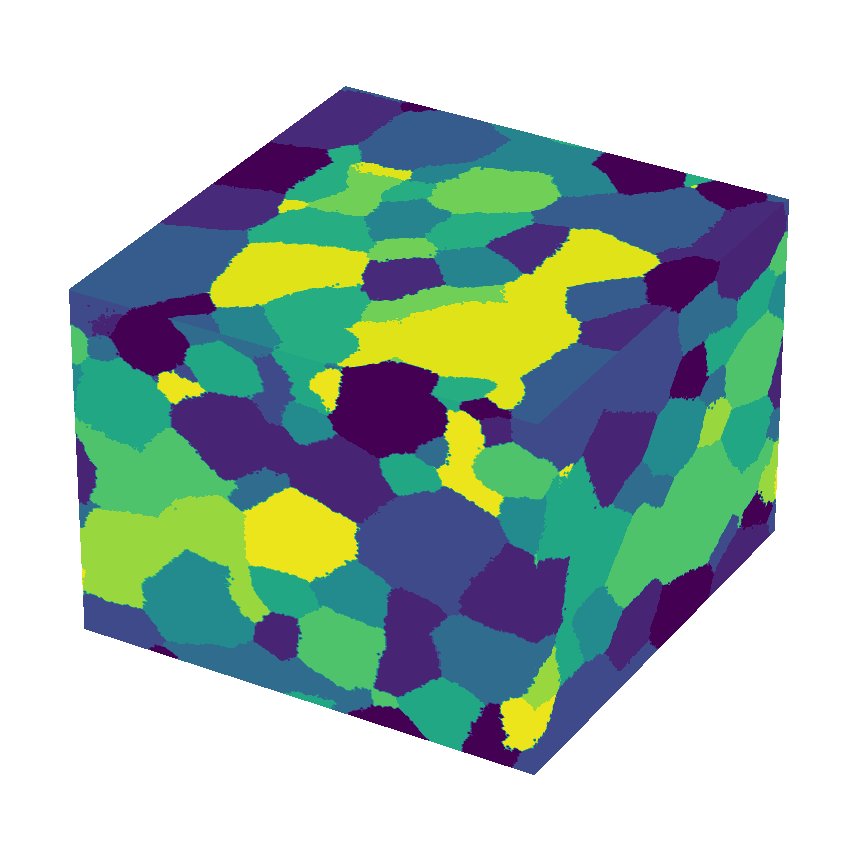

<Figure size 432x288 with 0 Axes>

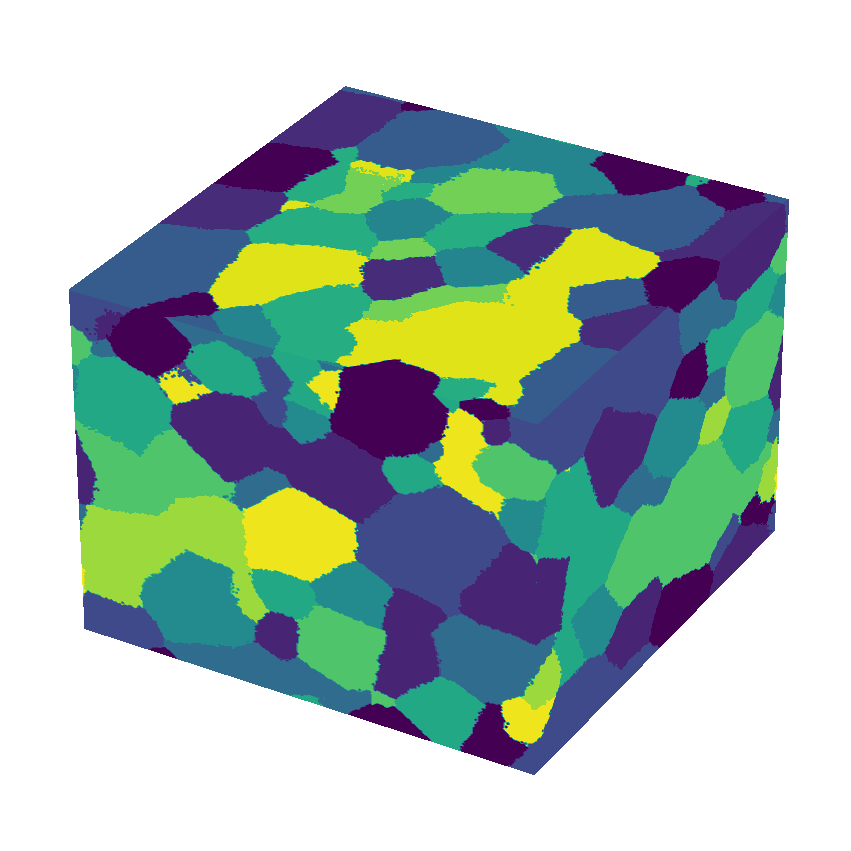

<Figure size 432x288 with 0 Axes>

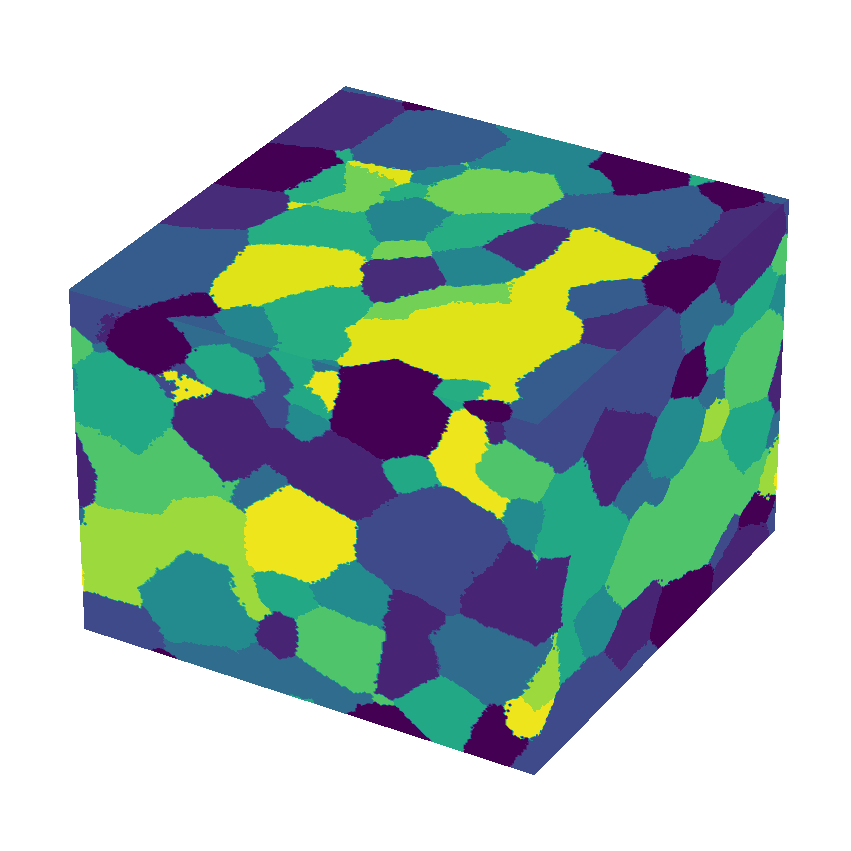

<Figure size 432x288 with 0 Axes>

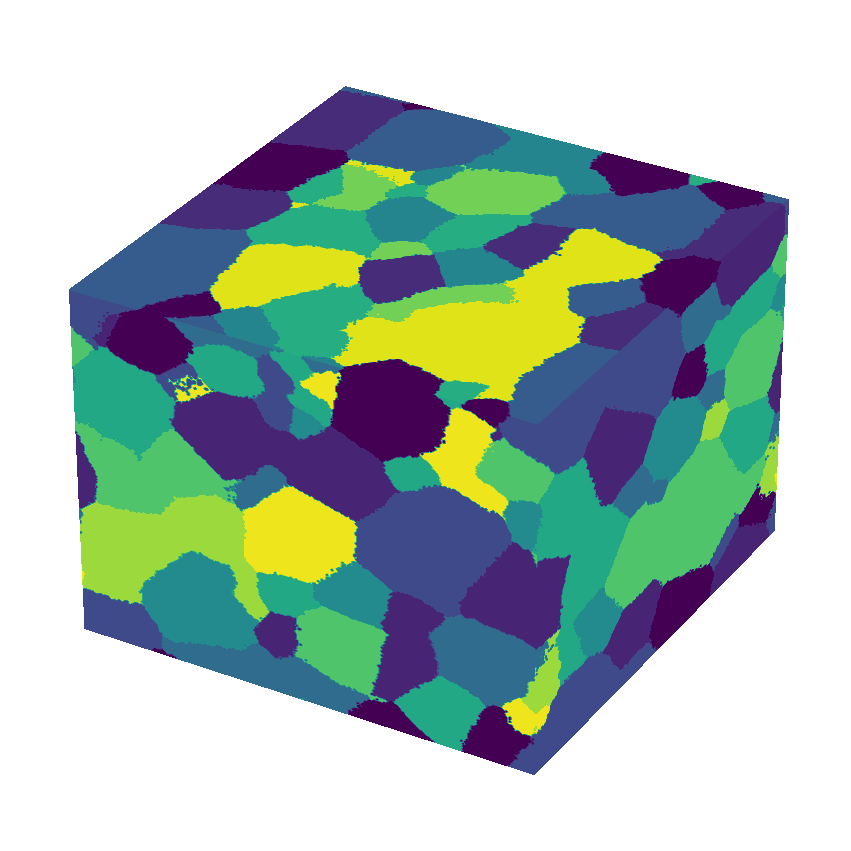

<Figure size 432x288 with 0 Axes>

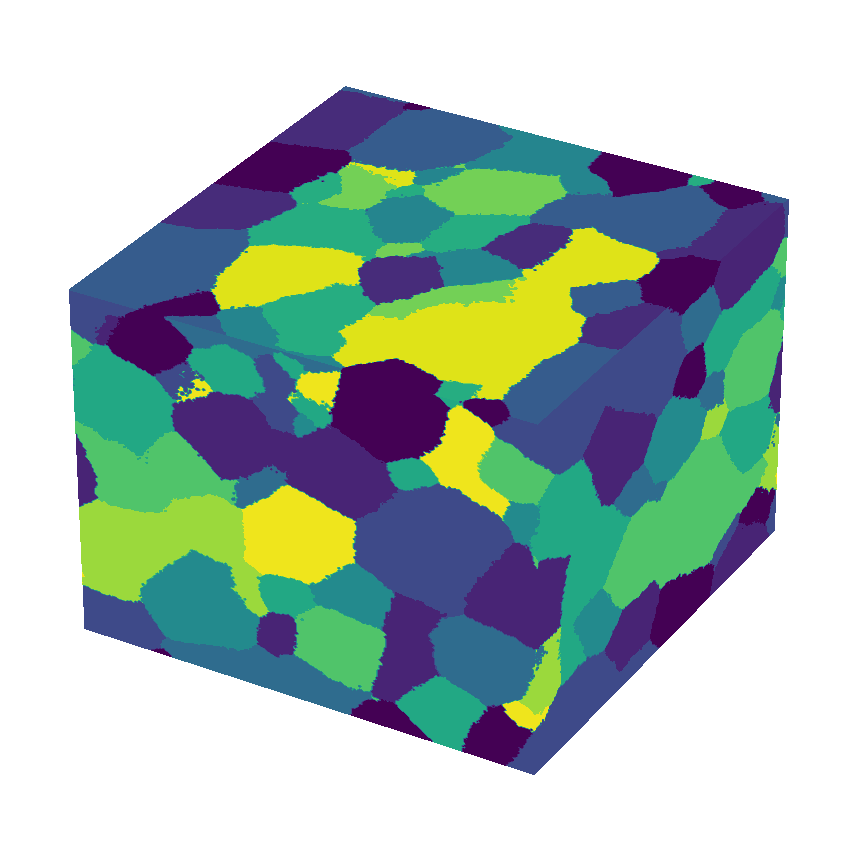

<Figure size 432x288 with 0 Axes>

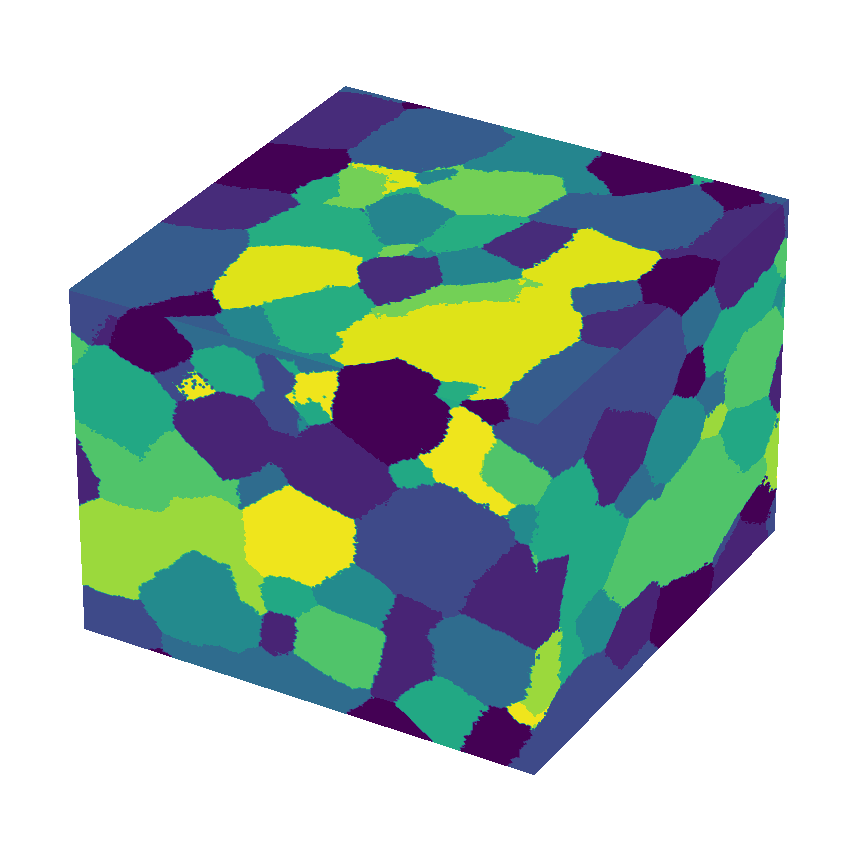

<Figure size 432x288 with 0 Axes>

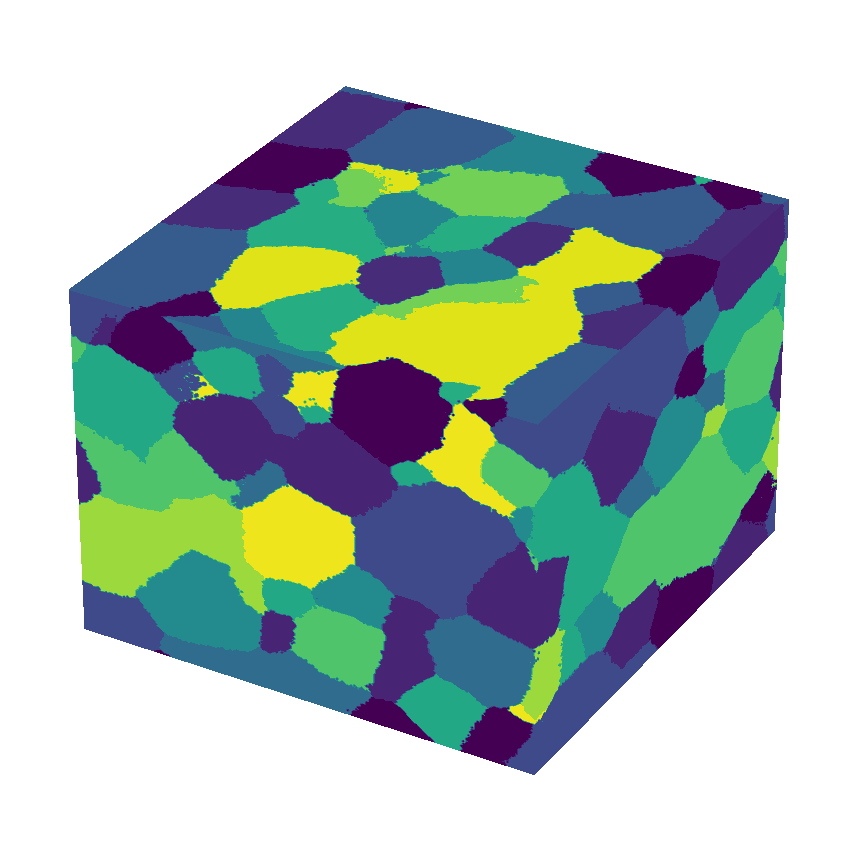

<Figure size 432x288 with 0 Axes>

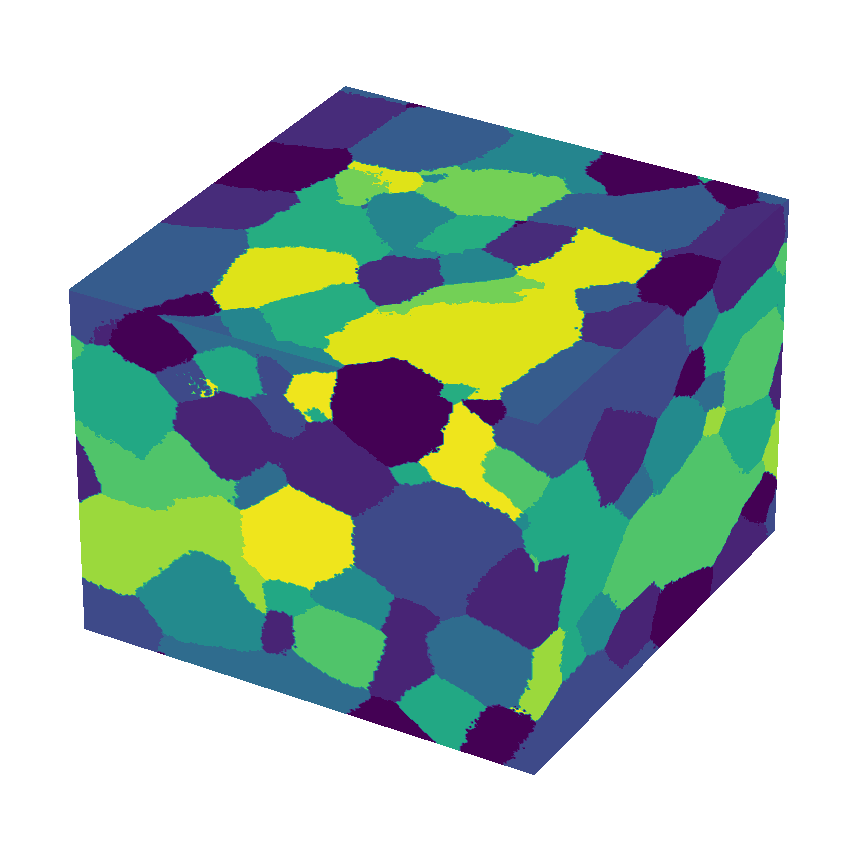

<Figure size 432x288 with 0 Axes>

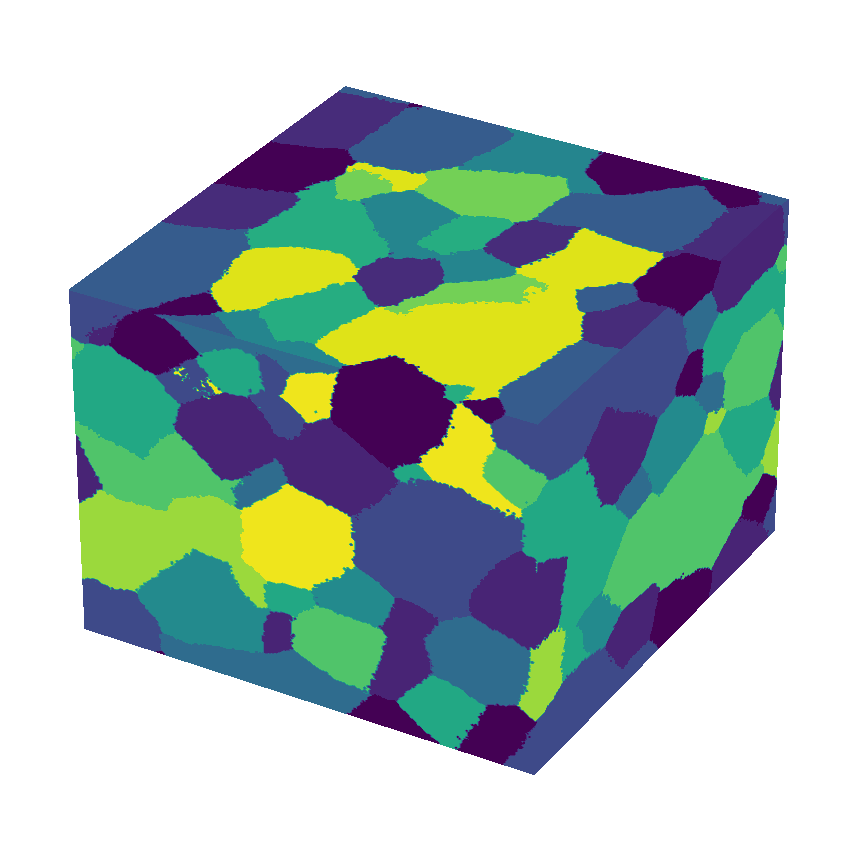

<Figure size 432x288 with 0 Axes>

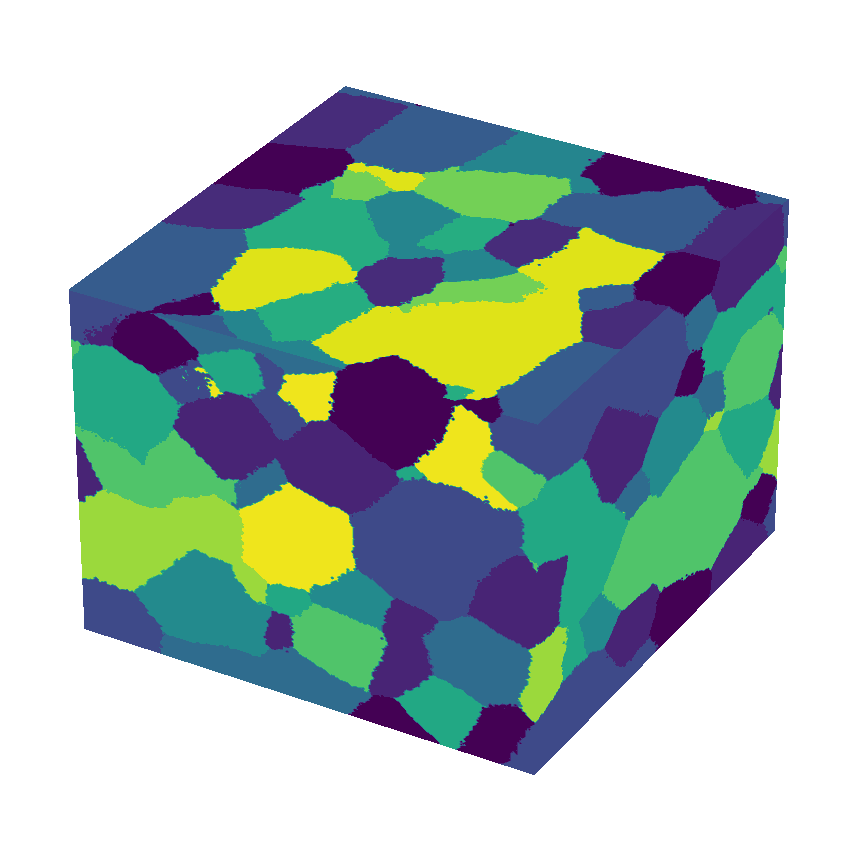

<Figure size 432x288 with 0 Axes>

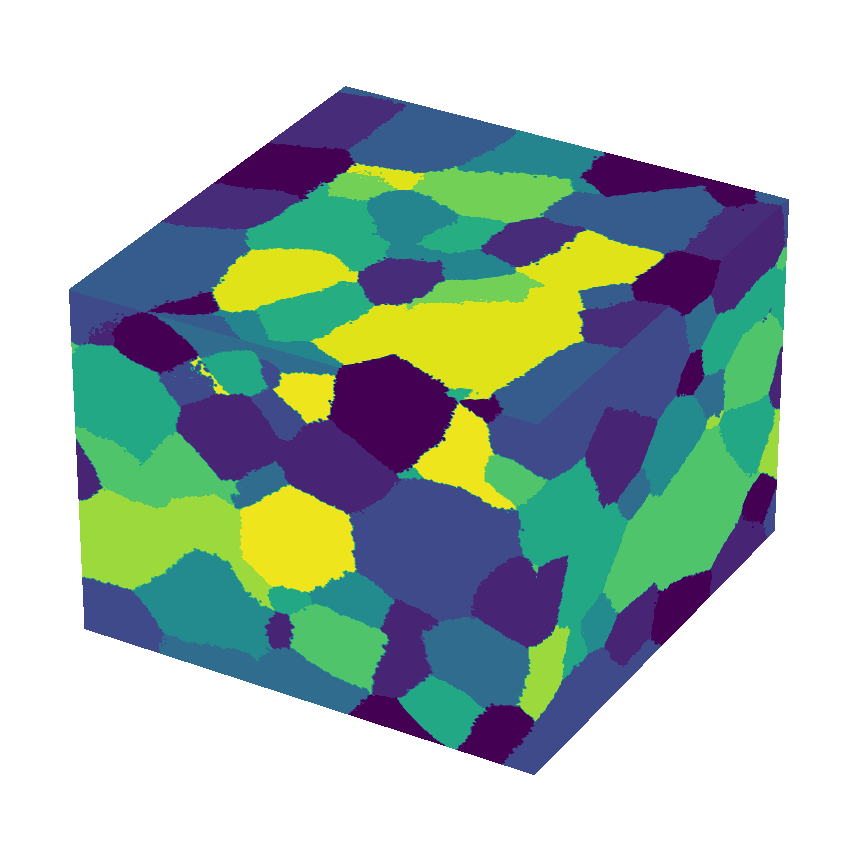

<Figure size 432x288 with 0 Axes>

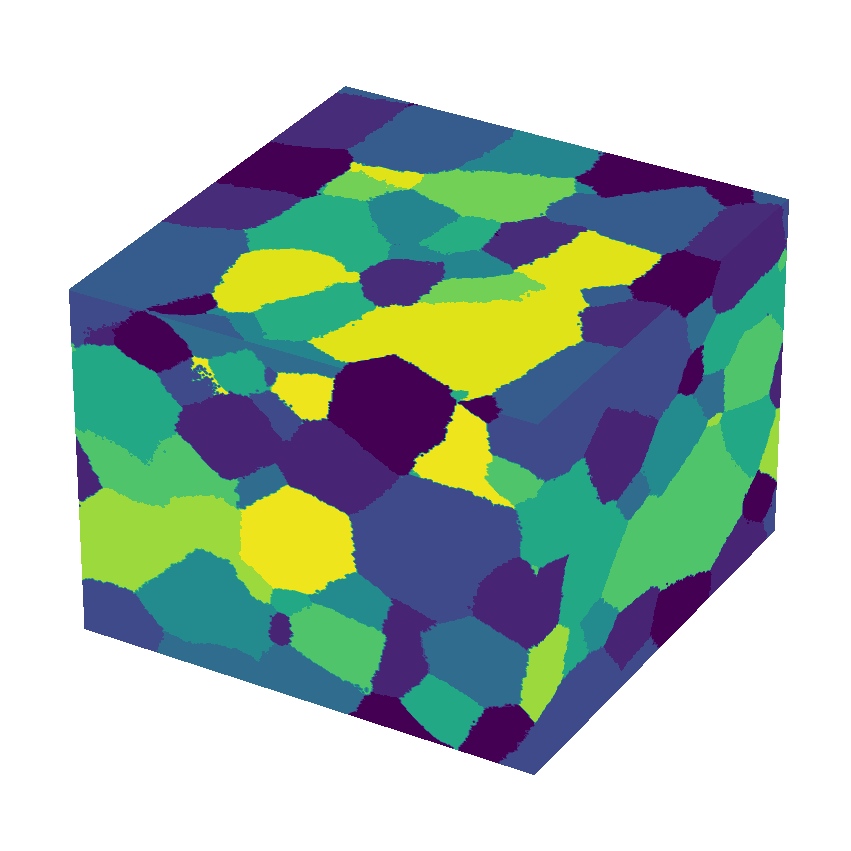

<Figure size 432x288 with 0 Axes>

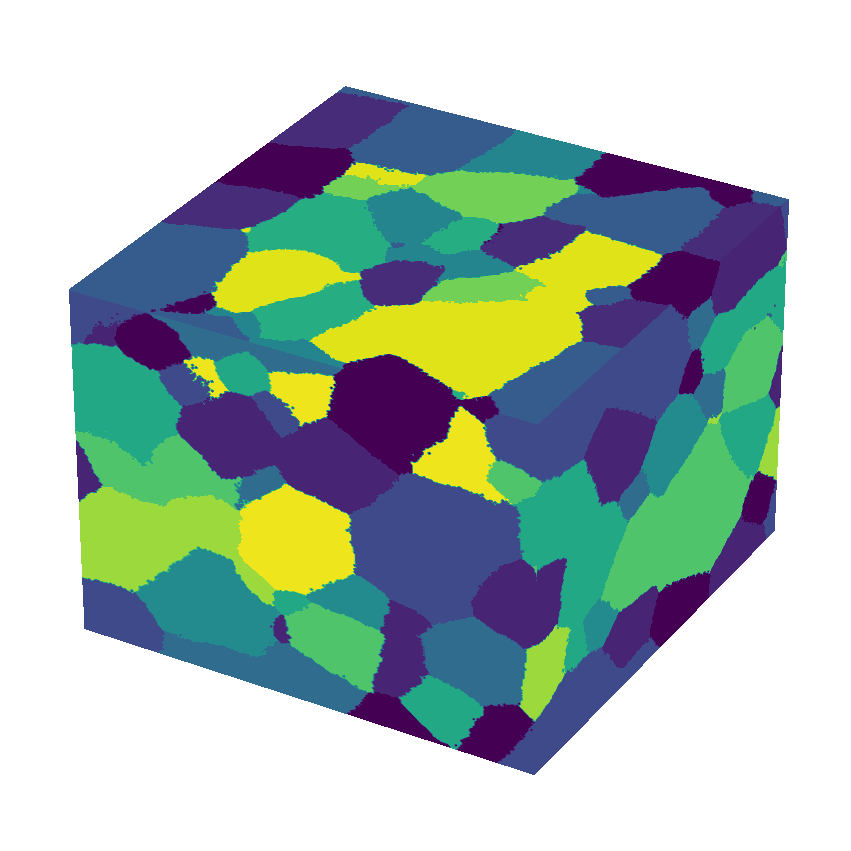

<Figure size 432x288 with 0 Axes>

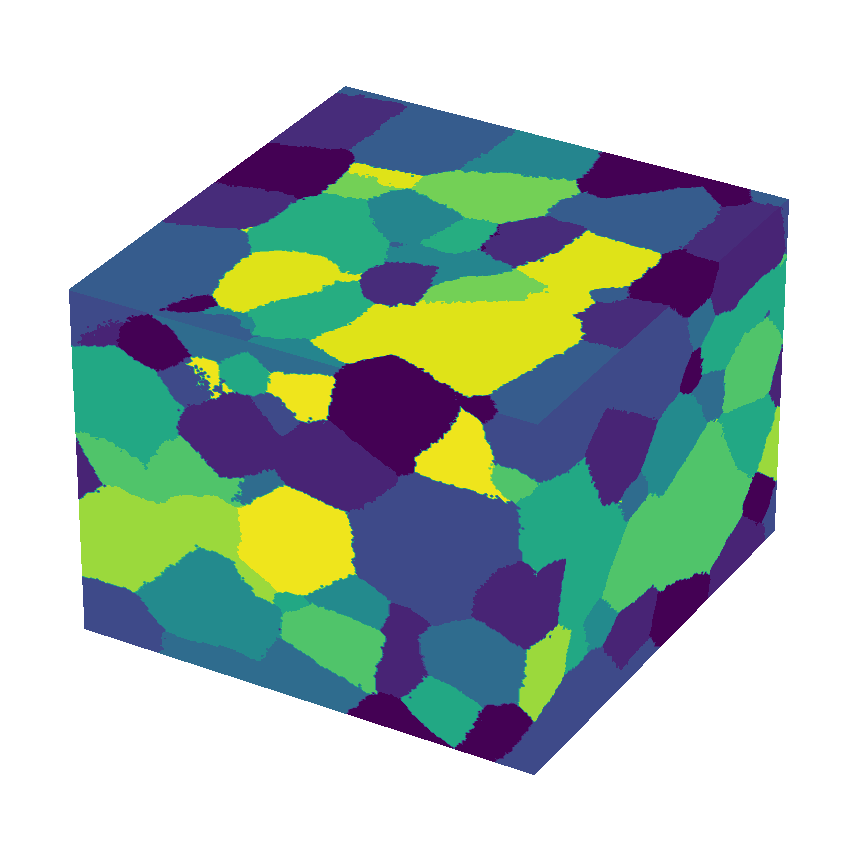

<Figure size 432x288 with 0 Axes>

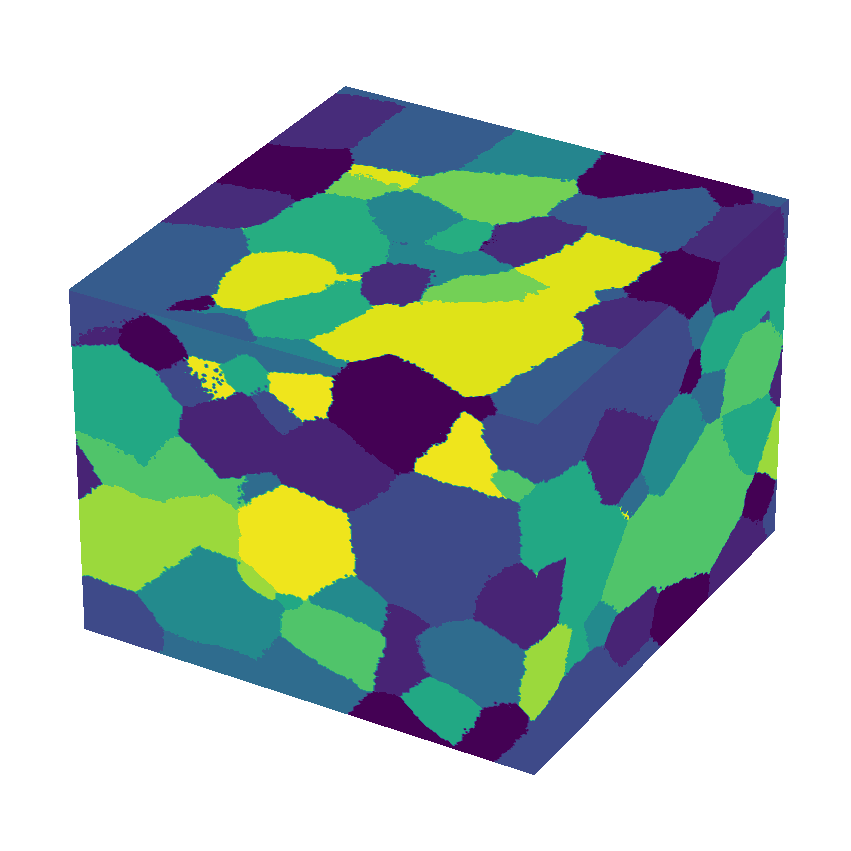

<Figure size 432x288 with 0 Axes>

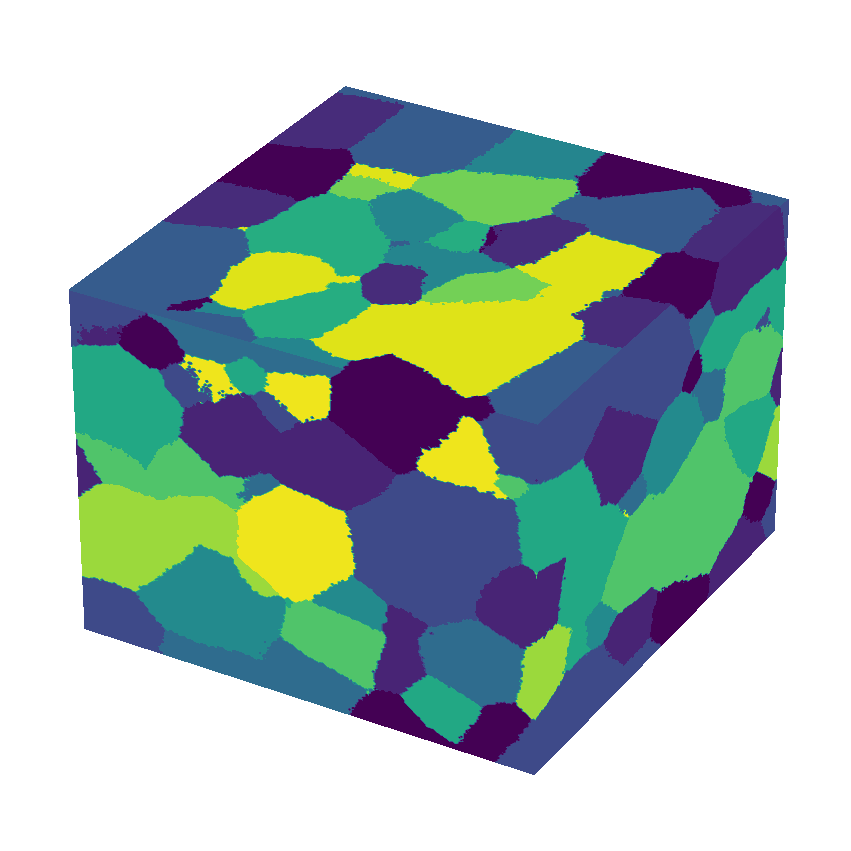

<Figure size 432x288 with 0 Axes>

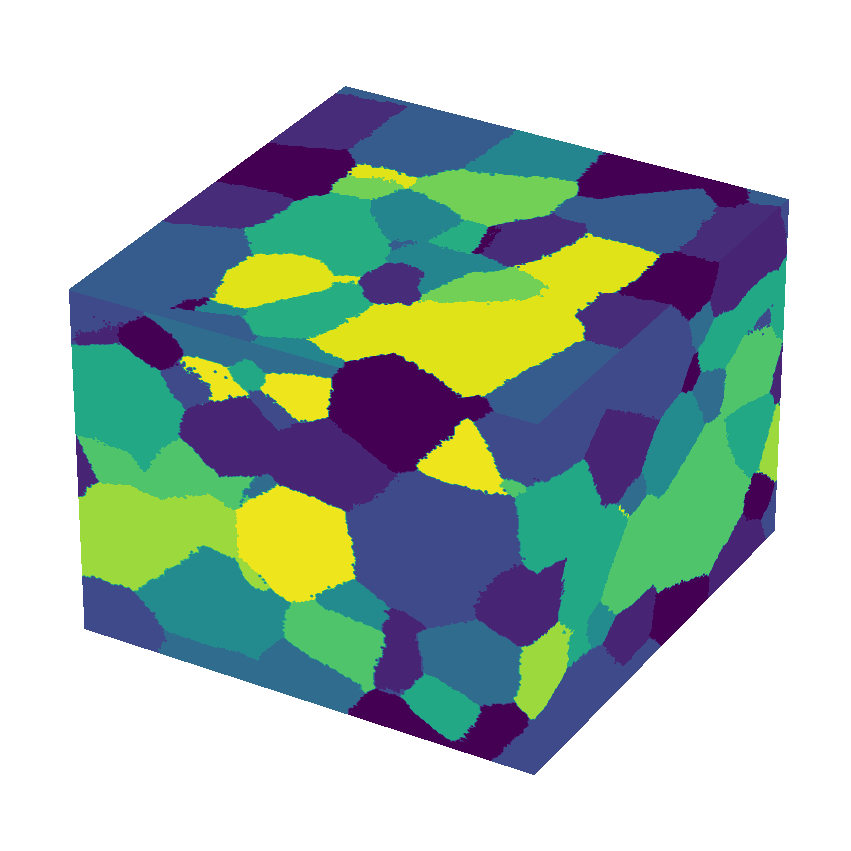

In [3]:
    # plot 3D microstructure
    time_step = 50
    for time_step in range(1,npy_file_aniso.shape[0]):
        figure_path = current_path + f"/microstructure_figures/3Dmicrostructure_{data_type}_whole_step{time_step}"
        current_data = npy_file_aniso[time_step]
        size_x,size_y,size_z = current_data.shape
        X, Y, Z = np.meshgrid(np.arange(size_x),np.arange(size_y),np.arange(size_z))
        plt.figure()
        fig = plt.figure(figsize=(15, 20))
        ax = fig.add_subplot(projection='3d')
        kw = {
            'vmin': current_data.min(),
            'vmax': current_data.max(),
            'cmap': 'viridis_r',
        }
        # Plot contour surfaces
        _ = ax.contourf(
            X[:, :, -1], Y[:, :, -1], current_data[:, :, -1],
            zdir='z', offset=Z.max(), **kw
        )
        _ = ax.contourf(
            X[0, :, :], current_data[0, :, :], Z[0, :, :],
            zdir='y', offset=0, **kw
        )
        C = ax.contourf(
            current_data[:, -1, :], Y[:, -1, :], Z[:, -1, :],
            zdir='x', offset=X.max(), **kw
        )
        ax.axis("off")
        plt.xlabel(r"x", fontsize=10)
        plt.ylabel(r"y", fontsize=10)
        ax.set_zlabel(r"z", fontsize=10)
        plt.xlim([0,size_x])
        plt.ylim([0,size_y])
        ax.set_zlim([0,size_z])
        # plt.savefig(figure_path+"_micro.png", dpi=400,bbox_inches='tight')

        # plt.figure()
        # fig = plt.figure(figsize=(15, 20))
        # ax = fig.add_subplot(projection='3d')
        # kw = {
        #     'vmin': current_data.min(),
        #     'vmax': current_data.max(),
        #     'cmap': 'viridis_r',
        # }
        # # Plot contour surfaces
        # _ = ax.contourf(
        #     current_data[:, 0, :], Y[:, 0, :], Z[:, 0, :],
        #     zdir='x', offset=0, **kw
        # )
        # _ = ax.contourf(
        #     current_data[:, int(size_x/3), :], Y[:, int(size_x/3), :], Z[:, int(size_x/3), :],
        #     zdir='x', offset=int(size_x/3), **kw
        # )
        # _ = ax.contourf(
        #     current_data[:, int(size_x*2/3), :], Y[:, int(size_x*2/3), :], Z[:, int(size_x*2/3), :],
        #     zdir='x', offset=int(size_x*2/3), **kw
        # )
        # C = ax.contourf(
        #     current_data[:, -1, :], Y[:, -1, :], Z[:, -1, :],
        #     zdir='x', offset=X.max(), **kw
        # )
        # ax.axis("off")
        # plt.xlabel(r"x", fontsize=10)
        # plt.ylabel(r"y", fontsize=10)
        # ax.set_zlabel(r"z", fontsize=10)
        # plt.xlim([0,size_x])
        # plt.ylim([0,size_y])
        # ax.set_zlim([0,size_z])
        # plt.savefig(figure_path, dpi=400,bbox_inches='tight')
    